# Global Economic Impact Analysis

## Introduction

This research project examines the economic effects of global events on financial markets. It seeks to provide an objective analysis of how these events influence economic indicators and market behavior both regionally and internationally.

## Project Objectives

The objective is to analyze financial data across various sectors such as world GDP, Defense Industry, US Department of Defense, construction, Aerospace and Defense, and cybersecurity during periods marked by significant events. This analysis aims to evaluate the performance and resilience of these sectors. Insights derived from this study are intended to enhance understanding of the economic repercussions associated with major global events on market trends and economic stability.

## Data Analysis Framework

The analysis begins with loading and examining datasets, including data from the Stockholm International Peace Research Institute that details arms imports and exports from 1950 to 2022. The Data Also Includes Bloomberg Intelligence Market Data for various sectors such as finance, defense, US Department of Defense Budget, construction, and cybersecurity fundflow during periods marked by significant events. This data provides a foundation for investigating economic trends during significant events, highlighting the complex interactions between global events and economic dynamics.

## Table of Contents

*   [1. Data Loading](#1.-Data-Loading)
*   [2. Macroeconomic Analysis: Global GDP](#2.-Macroeconomic-Analysis:-Global-GDP)
    *   [A. Seasonal Decomposition](#A.-Seasonal-Decomposition)
    *   [B. Fitting the ARIMA Model](#B.-Fitting-the-ARIMA-Model)
    *   [C. Comparative Analysis: The Shifting Tides of Global Economic Power](#C.-Comparative-Analysis:-The-Shifting-Tides-of-Global-Economic-Power)
*   [4. Visualizing the Global Economic Landscape](#4.-Visualizing-the-Global-Economic-Landscape:-A-Geographic-Time-Series-Analysis-of-GDP)
*   [5. Case Study: Aircraft Orders as a Barometer for the Global Aerospace Industry](#5.-Case-Study:-Aircraft-Orders-as-a-Barometer-for-the-Global-Aerospace-Industry)
*   [6. Analysis of U.S. Defense Budget Composition (1999-2023)](#6.-Analysis-of-U.S.-Defense-Budget-Composition-(1999-2023))
*   [7. The Evolution of Global Arms Trade Composition (1950-2022)](#7.-The-Evolution-of-Global-Arms-Trade-Composition-(1950-2022))
*   [8. Tracking Investor Sentiment: Cybersecurity Sector Fund Flows](#8.-Tracking-Investor-Sentiment:-Cybersecurity-Sector-Fund-Flows)
*   [9. Case Study: Perceived Airline Bankruptcy Risk During the COVID-19 Pandemic](#9.-Case-Study:-Perceived-Airline-Bankruptcy-Risk-During-the-COVID-19-Pandemic)
*   [10. The 'Work From Home' Boom: U.S. Homebuilder Confidence](#10.-The-'Work-From-Home'-Boom:-U.S.-Homebuilder-Confidence)
*   [11. Geographic Distribution of the Global Arms Trade (1950-2022)](#11.-Geographic-Distribution-of-the-Global-Arms-Trade-(1950-2022))
*   [12. Decomposing the Global Arms Trade by Weapon Category](#12.-Decomposing-the-Global-Arms-Trade-by-Weapon-Category)
*   [13. Guns vs. Butter: GDP vs. Arms Imports](#13.-Guns-vs.-Butter:-GDP-vs.-Arms-Imports)
*   [14. Conclusion](#14.-Conclusion)
*   [Appendix: Data Exploration](#Appendix:-Data-Exploration)

In [4]:
# Please do not delete this cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import plotly.express as px
import plotly.graph_objects as go

sys.path.append('./src')

from plotly.subplots import make_subplots
from data_loader import load_all_processed_data
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# 1. Data Loading

In [6]:
data_sources = load_all_processed_data()
all_arms_imports = data_sources["all_arms_imports"]
all_arms_exports = data_sources["all_arms_exports"]
top_200_arms_imports = data_sources["top_200_arms_imports"]
top_200_arms_exports = data_sources["top_200_arms_exports"]
bloom_consg_USCAN = data_sources["bloomberg_us_can_construction"]
bloom_cybersec_equity_flows = data_sources["bloomberg_cybersecurity_fundflows"]
bloom_def_budget = data_sources["bloomberg_defense_budget"]
bloom_def_industry = data_sources["bloomberg_defense_industry"]
gdp = data_sources["gdp"]

2025-11-02 18:25:22,799 - INFO - Loaded processed dataset: bloomberg_us_can_construction
2025-11-02 18:25:22,803 - INFO - Loaded processed dataset: top_200_arms_exports
2025-11-02 18:25:22,804 - INFO - Loaded processed dataset: all_arms_imports
2025-11-02 18:25:22,806 - INFO - Loaded processed dataset: bloomberg_defense_budget
2025-11-02 18:25:22,809 - INFO - Loaded processed dataset: bloomberg_cybersecurity_fundflows
2025-11-02 18:25:22,812 - INFO - Loaded processed dataset: bloomberg_defense_industry
2025-11-02 18:25:22,822 - INFO - Loaded processed dataset: gdp
2025-11-02 18:25:22,824 - INFO - Loaded processed dataset: all_arms_exports
2025-11-02 18:25:22,829 - INFO - Loaded processed dataset: top_200_arms_imports


# 2. Macroeconomic Analysis: Global GDP

## Visualizing the Trend in World GDP

The first step in any time-series analysis is to visualize the data. This allows us to get a high-level understanding of its fundamental characteristics, such as long-term trends, cyclical patterns, and overall volatility. This initial plot serves as the foundation for all subsequent modeling and forecasting.

**Analytical Objective:**
To plot the World Gross Domestic Product (GDP) from 1960 to 2022 to visually identify its primary trend.

**Methodology:**
The process involves a few key data preparation steps before plotting:
1.  **Data Extraction:** We begin with the full GDP dataset. The `set_index('Country Name')` function is used to easily select data by country. We then use `.loc['World', '1960':'2022']` to isolate the specific time series for 'World' GDP across the desired years.
2.  **Data Cleaning:** The extracted data is converted to a numeric format using `pd.to_numeric`. The `errors='coerce'` argument ensures that any non-numeric values (like `..`) are turned into `NaN` (Not a Number), which are then removed with `.dropna()`. This leaves us with a clean, purely numerical dataset.
3.  **Index Conversion:** The year labels are converted into proper datetime objects. This is a crucial step that allows Python's statistical and plotting libraries to recognize the data as a time series, ensuring the x-axis is scaled correctly.
4.  **Plotting:** Finally, the cleaned time-series data is plotted using `matplotlib` to create a line chart that visualizes the change in World GDP over time.

**Key Observations from the Plot:**
The resulting chart shows a clear and strong upward trend over the past six decades. The growth appears to be exponential rather than linear, meaning the rate of growth has accelerated over time. This observation is critical, as it informs our approach to the more advanced modeling techniques that follow.

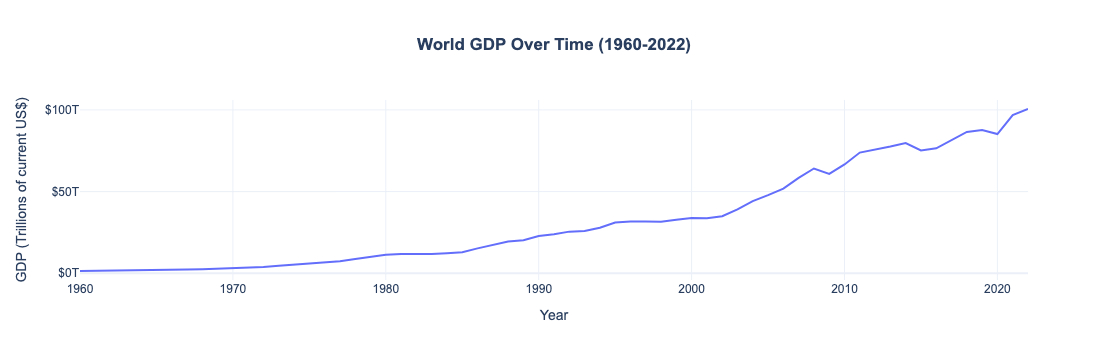

In [146]:
# --- 1. Prepare Data ---
gdp_df = gdp.get_data()
gdp_world = gdp_df[gdp_df["Country Name"] == "World"].copy()

# --- FIX: Explicitly provide the format for the year ---
# This removes ambiguity and prevents the DateParseError.
gdp_world['Year'] = pd.to_datetime(gdp_world['Year'], format='%Y', errors='coerce')

gdp_world['GDP'] = pd.to_numeric(gdp_world['GDP'], errors='coerce')
gdp_world.dropna(subset=['GDP', 'Year'], inplace=True)

# Create a 'GDP in Trillions' column for better axis formatting
gdp_world['GDP in Trillions'] = gdp_world['GDP'] / 1e12

# --- 2. Create the Plotly Line Chart ---
fig = px.line(
    gdp_world,
    x='Year',
    y='GDP in Trillions',
    title="<b>World GDP Over Time (1960-2022)</b>",
    template='plotly_white'
)

# --- 3. Update Layout and Hover Template for a Polished Look ---
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="GDP (Trillions of current US$)",
    yaxis_ticksuffix='T',
    yaxis_tickprefix='$',
    title_x=0.5,
    font=dict(family="Arial, sans-serif")
)

# Customize the hover information for clarity
fig.update_traces(
    hovertemplate="<b>Year:</b> %{x|%Y}<br><b>GDP:</b> $%{y:.2f}T<extra></extra>"
)

fig.show()

## A. Seasonal Decomposition

After observing the overall trend, the next step is to formally decompose the time series. Decomposition separates the data into its core underlying components, allowing us to analyze each one individually. This is a powerful diagnostic tool that helps us understand the structure of our data before attempting to forecast it.

**Analytical Objective:**
To break down the World GDP time series into its Trend, Seasonal, and Residual components.

**Methodology:**
We use the `seasonal_decompose` function from the `statsmodels` library, a standard tool for time-series analysis. The function separates the original time series (`gdp_data`) into three parts based on an `additive` model, where:

`Original Data = Trend + Seasonality + Residuals`

*   **Trend:** This component captures the long-term direction of the data—in this case, the consistent upward growth of GDP.
*   **Seasonality:** This component identifies repeating, predictable patterns over a fixed period. Since our data is annual, there is no intra-year seasonality to detect (e.g., no quarterly or monthly cycles). Therefore, we set `period=1`, and we expect this component to be a flat line.
*   **Residuals:** This represents the random, unpredictable "noise" left over in the data after the trend and seasonal components have been removed. In a good model, the residuals should not have any discernible pattern.

The `.plot()` function then conveniently visualizes these four series (Observed, Trend, Seasonal, and Residual) as separate subplots.

**Key Observations from the Plot:**
*   The **Trend** plot closely mirrors the original data, confirming the strong, persistent upward movement of the global economy.
*   The **Seasonal** plot is flat, as expected for annual data, confirming the absence of a yearly cyclical pattern.
*   The **Residuals** plot shows the random fluctuations around the trend. Analyzing this helps confirm that our model has captured the primary structure of the data.

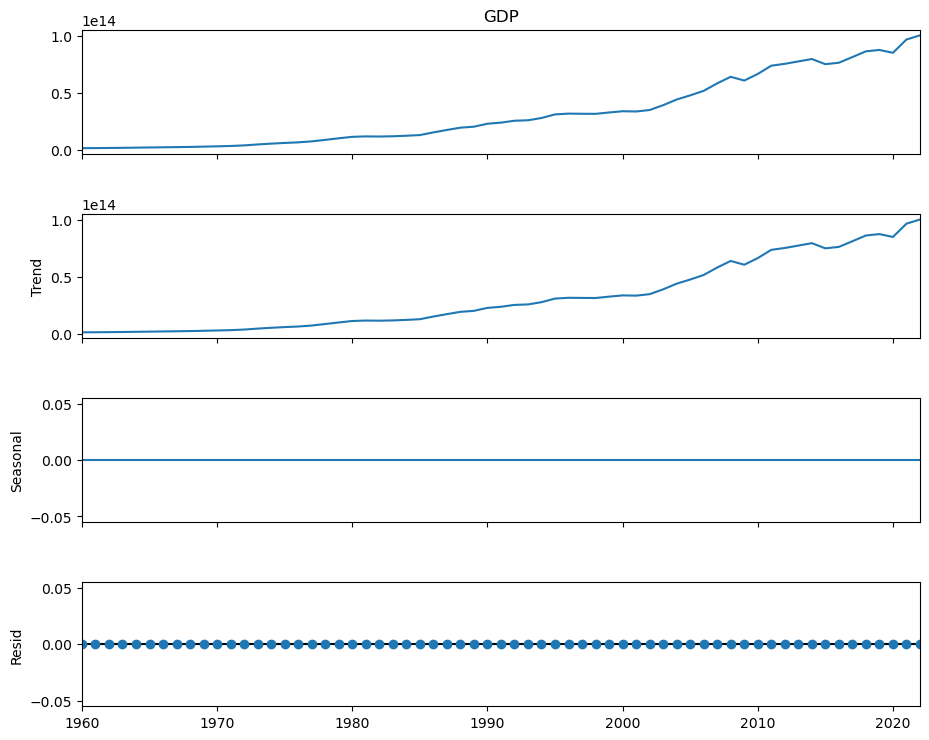

In [11]:
gdp_data = gdp_world.set_index('Year')['GDP']
decomposition = seasonal_decompose(gdp_data, model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

## B. Fitting the ARIMA Model

With the World GDP data prepared, we can now fit the ARIMA model. This is the core statistical engine of our forecast. The output of this step will not be a plot, but rather a summary table of the model's parameters and diagnostic statistics, which allows us to assess the model's validity.

**A Note on the Model's Limitations:**
It is important to interpret this forecast with caution. While the ARIMA(1,1,1) model is a standard and robust choice for well-trending data, it is a relatively simple time-series model. Its primary limitation is that it cannot account for external (exogenous) factors or sudden economic shocks, such as financial crises, geopolitical events, or pandemics. The forecast represents a statistical projection based on past trends, not a prediction of future economic events. A more advanced econometric model would be required for a more nuanced forecast.

**Methodology:**
1.  **Model Selection:** We use an ARIMA(p,d,q) model, where:
    *   `p=1`: One autoregressive term, meaning the model looks at the previous year's value to predict the current one.
    *   `d=1`: The data is differenced once to make it stationary (a requirement for ARIMA).
    *   `q=1`: One moving-average term, helping the model account for past forecast errors.
    This ARIMA(1,1,1) configuration is a common and robust choice for well-trending data like GDP.
2.  **Fitting:** The `ARIMA()` function from the `statsmodels` library is used to define the model, which is then fitted to our log-transformed GDP data using the `.fit()` method.
3.  **Summary Output:** We print the `model_fit.summary()` to inspect the results.

**Interpreting the Output Table:**
The summary table provides crucial insights:
*   **Coefficients (`coef`):** These show the weights of the autoregressive (`ar.L1`) and moving average (`ma.L1`) terms.
*   **P>|z|:** This column shows the statistical significance of each term. A value less than 0.05 indicates that the term is statistically significant and useful for the model.
*   **Diagnostic Tests:** The second half of the table includes tests like Ljung-Box (Q) and Jarque-Bera (JB). We look for probabilities (Prob) greater than 0.05, which would indicate that our model's residuals are well-behaved (resembling random noise) and that there are no underlying patterns left that the model failed to capture.

This statistical summary is a vital step to validate our model before proceeding to the final forecast and visualization.

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   63
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  96.290
Date:                Sun, 02 Nov 2025   AIC                           -186.579
Time:                        18:25:23   BIC                           -180.198
Sample:                    01-01-1960   HQIC                          -184.074
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9568      0.040     24.193      0.000       0.879       1.034
ma.L1         -0.5773      0.138     -4.171      0.000      -0.849      -0.306
sigma2         0.0026      0.000      6.052      0.0

/Users/what/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/Users/what/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/Users/what/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.



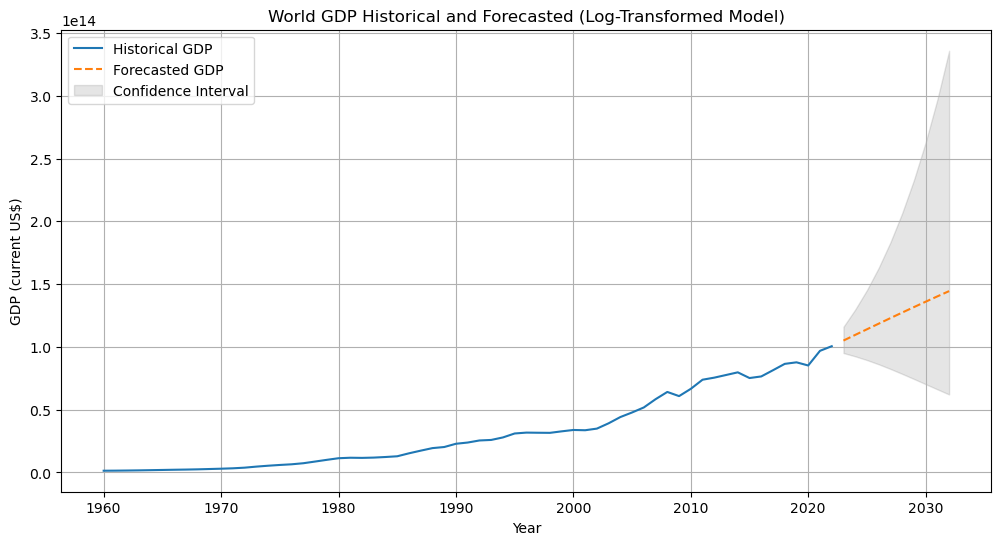

In [13]:
# Apply a logarithmic transformation to stabilize the variance
gdp_data_log = np.log(gdp_data)

# Fit ARIMA model on the transformed data
# The (1,1,1) order is a good starting point for the logged data as well.
model = ARIMA(gdp_data_log, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

# --- Forecasting ---
# Forecast on the log scale
forecast_log = model_fit.get_forecast(steps=10)
forecast_log_conf = forecast_log.conf_int()

# Transform the forecast back to the original scale
forecast_original = np.exp(forecast_log.predicted_mean)
forecast_conf_original = np.exp(forecast_log_conf)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(gdp_data, label='Historical GDP')
plt.plot(forecast_original, label='Forecasted GDP', linestyle='--')
plt.fill_between(forecast_conf_original.index,
                 forecast_conf_original.iloc[:, 0],
                 forecast_conf_original.iloc[:, 1], color='k', alpha=0.1, label='Confidence Interval')

plt.title('World GDP Historical and Forecasted (Log-Transformed Model)')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.grid(True)
plt.show()

# C. Comparative Analysis: The Shifting Tides of Global Economic Power

After examining the overall trend of World GDP, the next logical step is to disaggregate this global figure to understand the individual trajectories of key global players. This comparative analysis is essential for identifying the key drivers of global growth and observing the dramatic shifts in economic power over the past several decades.

**Analytical Objective:**
This visualization compares the Gross Domestic Product (in current US$) of a combined group of the world's major economies and top arms-trading nations. The objective is to provide a comprehensive view of:

*   **The Rise of Economic Superpowers:** Visually track the meteoric rise of economies like China and India.
*   **Divergence in Growth Paths:** Compare the growth trajectories of established Western economies with those of emerging powerhouses and major arms importers/exporters.
*   **Impact of Geopolitical Events:** Identify periods of stagnation or decline that correspond to major historical events.

**Methodology:**
We first create a comprehensive list of countries by combining a manually selected list of major economies with a dynamically generated list of the top 10 arms importers and exporters (based on SIPRI data). The World Bank GDP data is then filtered to this unique set of nations. Using `plotly.express`, we render a distinct, color-coded line for each country, creating a clear and interactive comparison of their economic journeys.

Plotting a combined list of 18 unique economies and arms traders.


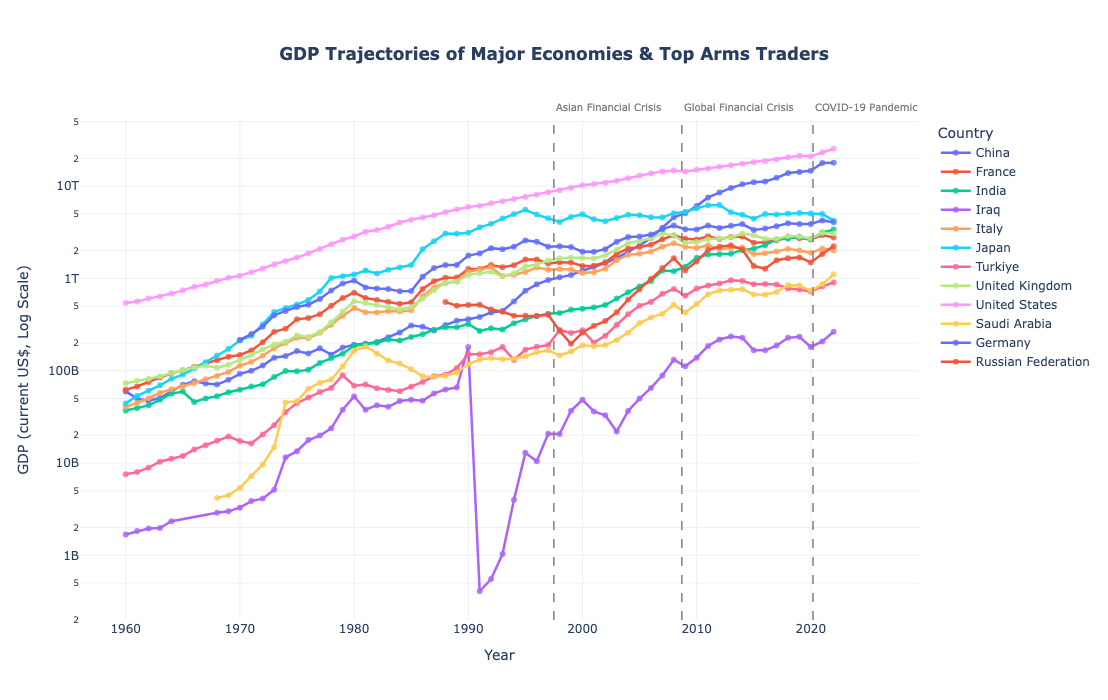

In [144]:
# --- 1. Define and Generate Country Lists ---
# a. Manually defined list of major economies
major_economies = [
    'United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'Russian Federation'
]

# b. Dynamically generate list of top arms traders
top_imports_df = top_200_arms_imports.get_data()
top_exports_df = top_200_arms_exports.get_data()
top_10_importers = top_imports_df.groupby('Recipient')['Value'].sum().nlargest(10).index.tolist()
top_10_exporters = top_exports_df.groupby('Supplier')['Value'].sum().nlargest(10).index.tolist()

# --- 2. Combine and Unify the Lists ---
# Use a set union to create a single, unique, sorted list of countries
countries_to_compare = sorted(list(set(major_economies) | set(top_10_importers) | set(top_10_exporters)))

print(f"Plotting a combined list of {len(countries_to_compare)} unique economies and arms traders.")

# --- 3. Prepare Data for the Combined List ---
gdp_raw_df = gdp.get_data()
gdp_filtered_df = gdp_raw_df[gdp_raw_df['Country Name'].isin(countries_to_compare)].copy()
gdp_filtered_df['Year'] = pd.to_datetime(gdp_filtered_df['Year'], format='%Y', errors='coerce')
gdp_filtered_df['GDP'] = pd.to_numeric(gdp_filtered_df['GDP'], errors='coerce')
gdp_filtered_df.dropna(subset=['Year', 'GDP'], inplace=True)

# --- 4. Plotting the Combined Chart ---
fig = px.line(
    gdp_filtered_df,
    x='Year',
    y='GDP',
    color='Country Name',
    title='<b>GDP Trajectories of Major Economies & Top Arms Traders</b>',
    labels={'GDP': 'GDP (current US$, log scale)', 'Year': 'Year'},
    hover_name='Country Name',
    log_y=True,
    markers=True,
    template='plotly_white'
)

fig.update_traces(line=dict(width=2.5), marker=dict(size=6, opacity=0.8))

# Add annotations for key global events
event_annotations = {
    '1997-07-01': 'Asian Financial Crisis',
    '2008-09-15': 'Global Financial Crisis',
    '2020-03-11': 'COVID-19 Pandemic'
}
for date, text in event_annotations.items():
    fig.add_vline(x=pd.to_datetime(date), line_width=1.5, line_dash="dash", line_color="grey")
    fig.add_annotation(
        x=pd.to_datetime(date), y=1.01, yref="paper", text=text, showarrow=False,
        font=dict(size=10, color="grey"), textangle=0, xanchor='left', yanchor='bottom'
    )

fig.update_layout(
    title_x=0.5,
    yaxis_title='GDP (current US$, Log Scale)',
    legend_title='Country',
    height=700,
    margin=dict(t=120)
)

# --- 5. NEW: Customize Tooltip for Consistency and Readability ---
fig.update_traces(
    hovertemplate=(
        "<b>%{hovertext}</b><br><br>"  # Gets the Country Name from hover_name
        "Year: %{x|%Y}<br>"           # Formats the year
        "GDP: %{y:$,.0f}"             # Formats the GDP value
        "<extra></extra>"             # Hides the trace name
    )
)

fig.show()

# 4. Visualizing the Global Economic Landscape: A Geographic Time-Series Analysis of GDP

While line charts are excellent for comparing the trajectories of a few selected economies, a choropleth map provides a powerful, holistic view of the entire global economic landscape. This visualization allows us to see not just *how much* economic output has grown over time, but also *where* that growth has been concentrated.

**Analytical Objective:**
The goal of this interactive map is to visualize the geographic distribution of wealth (as measured by GDP in current US$) across the world and to observe how this distribution has shifted dramatically from 1960 to the present day. It helps answer key geopolitical and economic questions, such as:
*   **Rise of Economic Powers:** How can we visually track the emergence of countries like China and India as global economic powerhouses?
*   **Regional Disparities:** What does the map reveal about persistent wealth gaps between different regions of the world?
*   **Impact of Major Events:** Can we see the economic impact of events like the fall of the Soviet Union or major regional recessions on the map?

**Methodology:**
The World Bank GDP data, which is structured with years as columns, is first "melted" into a "long" or "tidy" format. This creates a data structure suitable for mapping, with one row per country per year. Using Plotly Express, we can then generate a choropleth map where each country's color corresponds to its GDP in a given year. The `animation_frame` feature adds a time slider, transforming a static map into a dynamic story of global economic change over six decades.

This visualization provides a crucial macro-level perspective, setting the stage for more detailed analyses of specific sectors and events.

In [18]:
# --- 1. Initial Data Preparation ---
gdp_long_df = gdp.get_data().copy()
gdp_long_df.dropna(subset=["Year", "GDP", "Country Code", "Country Name"], inplace=True)
gdp_long_df["YearInt"] = pd.to_numeric(gdp_long_df["Year"], errors='coerce')
gdp_long_df["GDP"] = pd.to_numeric(gdp_long_df["GDP"], errors='coerce')

# --- 2. Create Persistent Data using Pivot and Forward-Fill ---
country_map = gdp_long_df[['Country Code', 'Country Name']].drop_duplicates()
gdp_wide = gdp_long_df.pivot_table(
    index='YearInt', 
    columns='Country Code', 
    values='GDP'
)
gdp_wide_filled = gdp_wide.ffill()
gdp_persistent_df = gdp_wide_filled.reset_index().melt(
    id_vars='YearInt',
    var_name='Country Code',
    value_name='GDP'
)
gdp_persistent_df = pd.merge(gdp_persistent_df, country_map, on='Country Code', how='left')

# Final cleanup
gdp_persistent_df.dropna(subset=['GDP', 'Country Name'], inplace=True)
gdp_persistent_df = gdp_persistent_df[gdp_persistent_df['GDP'] > 0].copy()
gdp_persistent_df.sort_values('YearInt', inplace=True)
gdp_persistent_df['YearInt'] = gdp_persistent_df['YearInt'].astype(int)
gdp_persistent_df['Log GDP'] = np.log10(gdp_persistent_df['GDP'])

# --- 3. Plotting the Interactive World Map ---
fig = px.choropleth(
    gdp_persistent_df,
    locations="Country Code",
    color="Log GDP",
    hover_name="Country Name",
    custom_data=['GDP', 'YearInt', 'Log GDP'],
    animation_frame="YearInt",
    color_continuous_scale=px.colors.sequential.Plasma,
    projection="natural earth",
    title="<b>World GDP by Country Over Time (Logarithmic Scale)</b>"
)

# --- 4. Define the Desired Hover Template ---
# Define it once as a variable for consistency
hovertemplate = (
    "<b>%{hovertext}</b><br><br>"
    "Year: %{customdata[1]}<br>"
    "GDP: %{customdata[0]:$,.0f}<br>"
    "Log GDP: %{customdata[2]:.3f}"
    "<extra></extra>"
)

# --- 5. Apply the Hover Template to ALL Frames ---
# --- FIX: Apply to the base trace first, then loop through all animation frames ---
fig.update_traces(hovertemplate=hovertemplate)

for frame in fig.frames:
    # Each frame in a choropleth animation has one trace in its `data` list
    frame.data[0].hovertemplate = hovertemplate

# --- 6. Update Layout and Customize the Color Bar ---
fig.update_layout(
    width=1100,
    height=900,
    coloraxis=dict(
        colorbar=dict(
            title="GDP (current US$)",
            tickvals=[9, 10, 11, 12, 13, 14],
            ticktext=["$1B", "$10B", "$100B", "$1T", "$10T", "$100T"]
        )
    )
)
fig.layout.sliders[0].currentvalue.prefix = 'Year: '

fig.show()

# 5. Case Study: Aircraft Orders as a Barometer for the Global Aerospace Industry

While aggregate defense indices provide a high-level view, a deeper case study requires examining the tangible economic activity of key industry players. The commercial aerospace sector, dominated by the Airbus-Boeing duopoly, serves as an excellent real-time barometer for global economic health, industry resilience, and geopolitical currents.

**Analytical Objective:**
This analysis visualizes the monthly net aircraft orders (new orders minus cancellations) for Airbus and Boeing. Aircraft are significant capital expenditures for airlines, and their ordering patterns are a strong leading indicator of:
*   **Global Economic Confidence:** Airlines place large orders when they are optimistic about future GDP growth and travel demand.
*   **Sector Health:** A decline in orders or a spike in cancellations can signal immediate distress within the airline and aerospace manufacturing industries.
*   **Competitive Dynamics:** The data allows for a direct comparison of market share and performance between the two industrial giants.

**Methodology:**
The data, sourced from Bloomberg Intelligence, is processed to isolate the monthly net orders for each manufacturer. By plotting this as a grouped bar chart, we can directly compare their performance and analyze trends against the timeline of major global events.

**Key Areas of Inquiry for this Case Study:**
1.  **Impact of Economic Shocks:** How did events like the COVID-19 pandemic affect order volumes and cancellations?
2.  **Sector Resilience:** What does the pace of recovery in aircraft orders tell us about the industry's ability to rebound from crises?
3.  **Company-Specific Events:** Can we identify the impact of events like the Boeing 737 MAX groundings on the competitive balance between the two manufacturers?

This visualization aims to move beyond abstract indices to uncover a clear narrative of how major events translate into concrete industrial and economic outcomes.

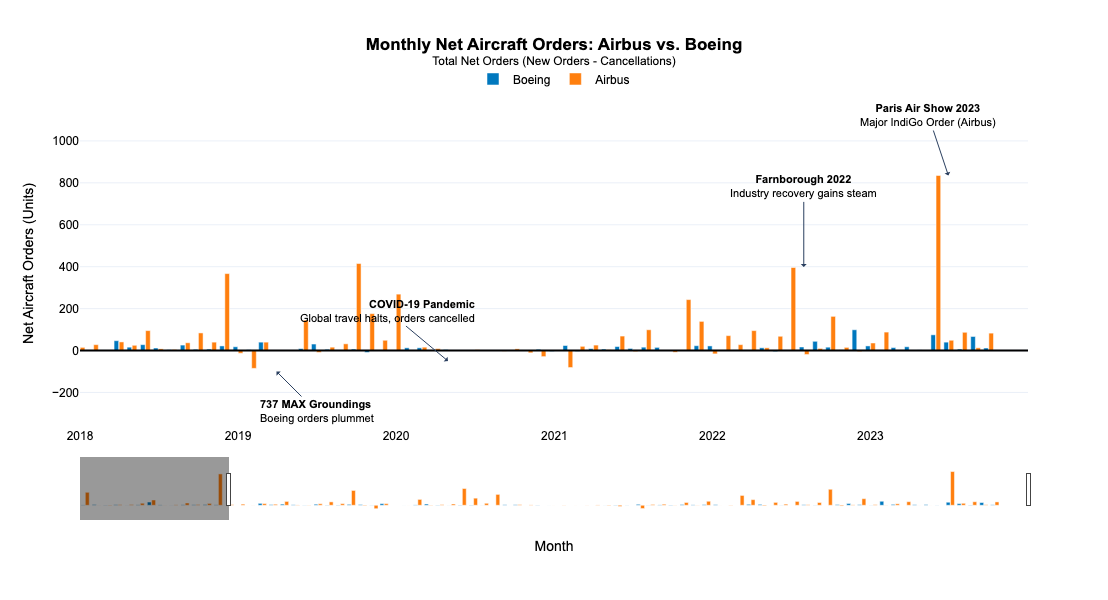

In [142]:
# --- 1. Start with the clean, pre-processed DataFrame ---
defense_industry_df = bloom_def_industry.get_data()

# --- 2. Robustly Clean the Columns to Create a Clean DatetimeIndex ---
df_transposed = defense_industry_df.T
df_transposed.index = pd.to_datetime(df_transposed.index, format='%b-%y', errors='coerce')
df_transposed = df_transposed.dropna(axis=0)
defense_industry_clean_df = df_transposed.T

# --- 3. Aggregate Data by Manufacturer ---
order_rows = defense_industry_clean_df[defense_industry_clean_df.index.str.strip().isin(['Airbus', 'Boeing'])].copy()
order_rows = order_rows.apply(pd.to_numeric, errors='coerce')
total_orders = order_rows.groupby(order_rows.index.str.strip()).sum()

# --- 4. Reshape the Data for Plotting ---
airbus_series = total_orders.loc['Airbus']
boeing_series = total_orders.loc['Boeing']
orders_df = pd.DataFrame({'Airbus': airbus_series, 'Boeing': boeing_series})
orders_df = orders_df.reset_index()
orders_df = orders_df.rename(columns={'index': 'Date'})
orders_long_df = pd.melt(orders_df, id_vars=['Date'], value_vars=['Airbus', 'Boeing'],
                         var_name='Manufacturer', value_name='Net Orders')

# --- 5. Plotting the Chart ---
fig = go.Figure()

color_map = {
    'Boeing': 'rgb(0, 120, 190)',
    'Airbus': 'rgb(255, 127, 14)'
}

for manufacturer, color in color_map.items():
    plot_data = orders_long_df[orders_long_df['Manufacturer'] == manufacturer]
    fig.add_trace(go.Bar(
        x=plot_data['Date'],
        y=plot_data['Net Orders'],
        name=manufacturer,
        marker_color=color,
        hovertemplate='<b>%{x|%b %Y}</b><br>Net Orders: %{y}<extra></extra>'
    ))

# --- 6. Update Layout with Enhancements ---
fig.update_layout(
    title='<b>Monthly Net Aircraft Orders: Airbus vs. Boeing</b><br><sup>Total Net Orders (New Orders - Cancellations)</sup>',
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    yaxis_title='Net Aircraft Orders (Units)',
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    template='plotly_white',
    width=1000,
    height=600,
    title_x=0.5,
    xaxis=dict(
        title='Month',
        rangeslider_visible=True
    ),
    xaxis_range=['2018-01-01', '2023-12-31'] # Adjusted default range to show all annotations
)

# Add the horizontal line at y=0
fig.add_hline(y=0, line_width=2, line_color="black")

# --- 7. Add Annotations for Key Events ---

# Annotation for Paris Air Show 2023 (Airbus Spike)
fig.add_annotation(
    x='2023-06-30', y=835,
    text="<b>Paris Air Show 2023</b><br>Major IndiGo Order (Airbus)",
    showarrow=True, arrowhead=1, ax=-20, ay=-60, font=dict(size=11)
)

# NEW Annotation for 737 MAX Groundings (Boeing Slump)
fig.add_annotation(
    x='2019-03-31', y=-100, # Approximate position of a major cancellation month
    text="<b>737 MAX Groundings</b><br>Boeing orders plummet",
    showarrow=True, arrowhead=1, ax=40, ay=40, font=dict(size=11), align="left"
)

# NEW Annotation for COVID-19 Pandemic Impact (Industry-wide Dip)
fig.add_annotation(
    x='2020-04-30', y=-50, # A month with significant cancellations
    text="<b>COVID-19 Pandemic</b><br>Global travel halts, orders cancelled",
    showarrow=True, arrowhead=1, ax=-60, ay=-50, font=dict(size=11), align="right"
)

# NEW Annotation for Farnborough Airshow 2022 (Industry Recovery)
fig.add_annotation(
    x='2022-07-31', y=399, # Corresponds to the July 2022 Airbus spike
    text="<b>Farnborough 2022</b><br>Industry recovery gains steam",
    showarrow=True, arrowhead=1, ax=0, ay=-80, font=dict(size=11)
)


fig.show()

# 6. Analysis of U.S. Defense Budget Composition (1999-2023)

To understand the strategic priorities of the world's largest military spender, we can analyze the composition of the U.S. Department of Defense budget. This visualization examines the allocation of funds across four primary categories since 1999:

*   **Operation and Maintenance (O&M):** The cost of day-to-day operations, training, and upkeep.
*   **Procurement:** Funding for the acquisition of new equipment, such as aircraft, ships, and vehicles.
*   **Research, Development, Test, and Evaluation (RDT&E):** Investment in future technologies and next-generation capabilities.
*   **Other:** Includes military construction, family housing, and miscellaneous accounts.

By plotting these as a stacked area chart, we can identify how major geopolitical events have influenced spending priorities over the past two decades.

**Methodology:**
The data, sourced from Bloomberg Intelligence, is filtered to isolate the four main budget components. It is then transformed into a "long" format suitable for plotting with `plotly.express`. The resulting stacked area chart visually represents both the total budget growth and the internal shifts in resource allocation year over year. Annotations are added to highlight the impact of significant historical events like the 9/11 attacks and the start of the Iraq War.

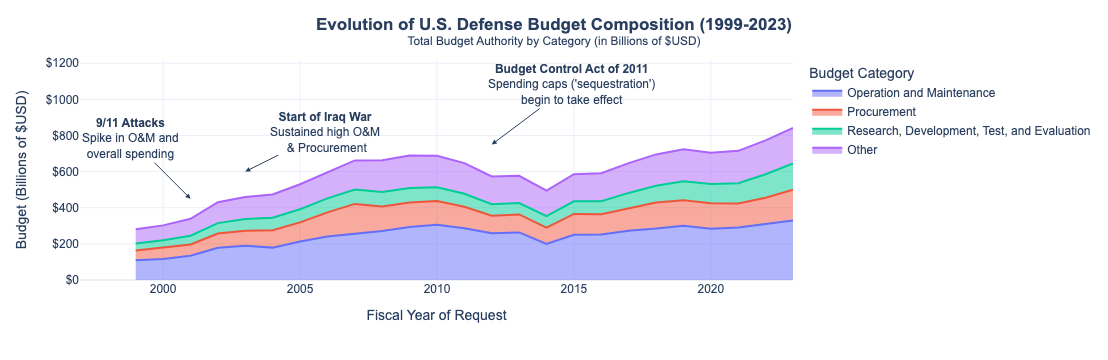

In [140]:
def prepare_budget_data(raw_df, categories_to_keep):
    """
    Cleans and transforms the raw, wide-format budget data into a 
    long-format DataFrame suitable for plotting with Plotly Express.
    """
    # 1. The raw data loads with categories as the index. First, we clean and filter it.
    df = raw_df.copy()
    df.index = df.index.str.strip()
    df_filtered = df.loc[categories_to_keep]

    # 2. Reset the index. This turns the index (named 'Description') into a column.
    df_with_col = df_filtered.reset_index()
    
    # 3. Unpivot the DataFrame from wide (years as columns) to long format.
    df_long = df_with_col.melt(
        id_vars=['Description'], 
        var_name='Year',
        value_name='Budget ($Bn)'
    )
    
    # 4. Rename 'Description' to 'Category' for clarity and clean data types.
    df_long.rename(columns={'Description': 'Category'}, inplace=True)
    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
    df_long['Budget ($Bn)'] = pd.to_numeric(df_long['Budget ($Bn)'], errors='coerce')
    
    return df_long

# --- 1. Define Parameters and Prepare Data ---
BUDGET_CATEGORIES = [
    'Operation and Maintenance',
    'Procurement',
    'Research, Development, Test, and Evaluation',
    'Other'
]
raw_budget_df = bloom_def_budget.get_data()
budget_data_long = prepare_budget_data(raw_budget_df, BUDGET_CATEGORIES)

# --- 2. Build the Chart ---
fig = px.area(
    budget_data_long,
    x='Year',
    y='Budget ($Bn)',
    color='Category',
    template='plotly_white'
)

# --- 3. Add Contextual Annotations and Styling ---
# --- FIX: Define each annotation separately to control its position ---

# Annotation for 9/11 Attacks (positioned to the left)
fig.add_annotation(
    x=2001, y=450,
    text="<b>9/11 Attacks</b><br>Spike in O&M and<br>overall spending",
    showarrow=True, arrowhead=2,
    ax=-60, ay=-60  # Move text left and down
)

# Annotation for Iraq War (positioned to the right)
fig.add_annotation(
    x=2003, y=600,
    text="<b>Start of Iraq War</b><br>Sustained high O&M<br> & Procurement",
    showarrow=True, arrowhead=2,
    ax=80, ay=-40   # Move text right and down
)

# Annotation for Budget Control Act (positioned further right)
fig.add_annotation(
    x=2012, y=750,
    text="<b>Budget Control Act of 2011</b><br>Spending caps ('sequestration')<br>begin to take effect",
    showarrow=True, arrowhead=2,
    ax=80, ay=-60   # Move text right and down
)

# --- 4. Update the Layout ---
fig.update_layout(
    title_text='<b>Evolution of U.S. Defense Budget Composition (1999-2023)</b><br><sup>Total Budget Authority by Category (in Billions of $USD)</sup>',
    title_x=0.5,
    font=dict(family="Arial, sans-serif"),
    xaxis_title='Fiscal Year of Request',
    yaxis_title='Budget (Billions of $USD)',
    yaxis_tickprefix='$',
    legend_title_text='Budget Category'
)

fig.show()

# 7. The Evolution of Global Arms Trade Composition (1950-2022)

Having examined the economic trajectories of major arms-trading nations, we now turn to the nature of the arms themselves. This analysis explores how the composition of the global arms trade has evolved since the mid-20th century, providing insights into the shifting doctrines and technological priorities of militaries worldwide.

**Analytical Objective:**
To visualize the proportional share of different weapon categories in the total global arms trade from 1950 to 2022. This will help us identify long-term trends, such as:
*   The prominence of **Aircraft** as a strategic and high-value asset.
*   The changing role of **Armoured Vehicles** and **Artillery** in conventional warfare.
*   The rise of advanced systems like **Missiles** and **Sensors**.

**Methodology:**
Using the Stockholm International Peace Research Institute (SIPRI) dataset on arms imports, we will create a 100% stacked area chart. This type of visualization is ideal for showing how the relative importance of each category changes over time. To ensure clarity, smaller categories are grouped together. Annotations will be added to mark key geopolitical eras, such as the height of the Cold War and the post-Cold War "peace dividend," to contextualize the trends observed.

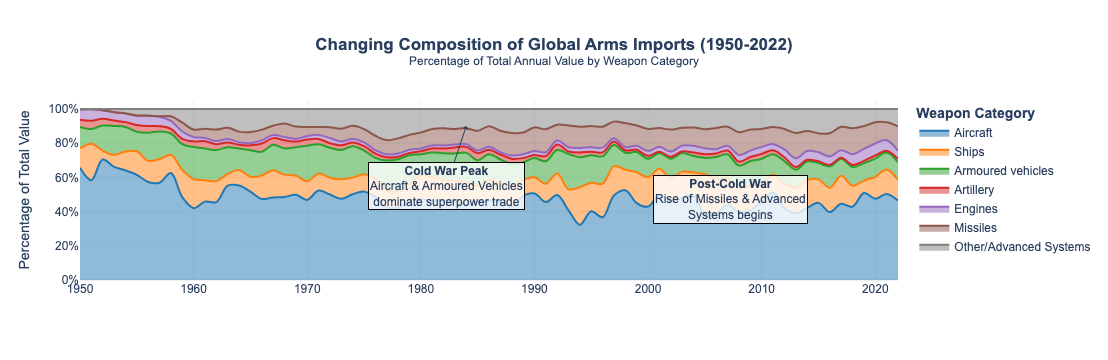

In [138]:
def prepare_arms_composition_data(raw_df):
    """
    Cleans and aggregates the raw arms import data to show the total value
    per weapon category for each year.
    """
    df = raw_df.copy()
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df.dropna(subset=['Year'], inplace=True)
    df['Year'] = df['Year'].astype(int)
    df = df[df['Arms Category'] != 'Total'].copy()
    small_categories = [
        'Naval weapons', 'Other', 'Satellites', 'Sensors', 'Air defence systems'
    ]
    df['Arms Category'] = df['Arms Category'].replace(small_categories, 'Other/Advanced Systems')
    aggregated_df = df.groupby(['Year', 'Arms Category'])['Value'].sum().reset_index()
    return aggregated_df

# --- 1. Prepare the Data ---
raw_arms_data = all_arms_imports.get_data()
arms_composition_data = prepare_arms_composition_data(raw_arms_data)

# --- 2. Define Chart Aesthetics ---
CATEGORY_COLORS = {
    "Aircraft": "#1f77b4", "Ships": "#ff7f0e", "Armoured vehicles": "#2ca02c",
    "Artillery": "#d62728", "Engines": "#9467bd", "Missiles": "#8c564b",
    "Other/Advanced Systems": "#7f7f7f"
}
CATEGORY_ORDER = list(CATEGORY_COLORS.keys())

# --- 3. Build the Chart ---
fig = px.area(
    arms_composition_data,
    x='Year',
    y='Value',
    color='Arms Category',
    groupnorm='percent',
    category_orders={"Arms Category": CATEGORY_ORDER},
    color_discrete_map=CATEGORY_COLORS,
    template='plotly_white',
    line_shape='spline'
)

# --- 4. Customize Tooltip ---
fig.update_traces(hovertemplate="%{y:.2f}%<extra></extra>")

# --- 5. Add Two Separate, Well-Placed Arrow Annotations ---
# Remove the old text block and add two distinct annotations.
# By carefully setting the `ax` and `ay` offsets, we prevent them from overlapping.

# Annotation 1: Cold War Peak (Text pushed down and to the left)
fig.add_annotation(
    x=1984, y=90,
    text="<b>Cold War Peak</b><br>Aircraft & Armoured Vehicles<br>dominate superpower trade",
    showarrow=True, arrowhead=1,
    ax=-20, ay=60, # Pushes text box left and down
    bgcolor="rgba(255, 255, 255, 0.8)",
    bordercolor="black",
    borderwidth=1
)

# Annotation 2: Post-Cold War (Text pushed up and to the right)
fig.add_annotation(
    x=2002, y=50,
    text="<b>Post-Cold War</b><br>Rise of Missiles & Advanced<br>Systems begins",
    showarrow=True, arrowhead=1,
    ax=60, ay=5, # Pushes text box right and up
    bgcolor="rgba(255, 255, 255, 0.8)",
    bordercolor="black",
    borderwidth=1
)

# --- 6. Update Layout for a Professional Finish ---
fig.update_layout(
    title_text='<b>Changing Composition of Global Arms Imports (1950-2022)</b><br><sup>Percentage of Total Annual Value by Weapon Category</sup>',
    title_x=0.5,
    font=dict(family="Arial, sans-serif", size=12),
    xaxis_title=None,
    yaxis_title='Percentage of Total Value',
    yaxis_ticksuffix='%',
    legend_title_text='<b>Weapon Category</b>',
    
    # Adjust margins for a clean look, removing the large right margin
    margin=dict(b=80, t=100) # Keep bottom and top margin for spacing
)

fig.show()

# 8. Tracking Investor Sentiment: Cybersecurity Sector Fund Flows

The cybersecurity sector's performance is not only tied to technological innovation but also to market perception of digital threats. A direct way to measure this is by tracking the flow of investment capital into cybersecurity-focused Exchange-Traded Funds (ETFs).

**Analytical Objective:**
This analysis visualizes the monthly net fund flows for the leading cybersecurity ETFs. The goal is to identify patterns in investor behavior and determine if there is a correlation between major cybersecurity events and investment in the sector. We seek to answer:
*   Do high-profile cyberattacks or geopolitical tensions trigger a flight to safety, leading to positive inflows?
*   Conversely, do broader market downturns lead to outflows, even if the underlying threat landscape is elevated?

**Methodology:**
The data is sourced from Bloomberg Intelligence and contains monthly fund flow data (in millions of USD) for several sector-specific ETFs. We will focus on the most prominent cybersecurity funds. The process involves:
1.  Filtering the dataset to isolate key cybersecurity ETFs.
2.  Transposing and "melting" the data to create a time-series format.
3.  Converting the month-year columns into a proper datetime index for plotting.
4.  Visualizing the data as a bar chart, where positive values represent net inflows and negative values represent net outflows.

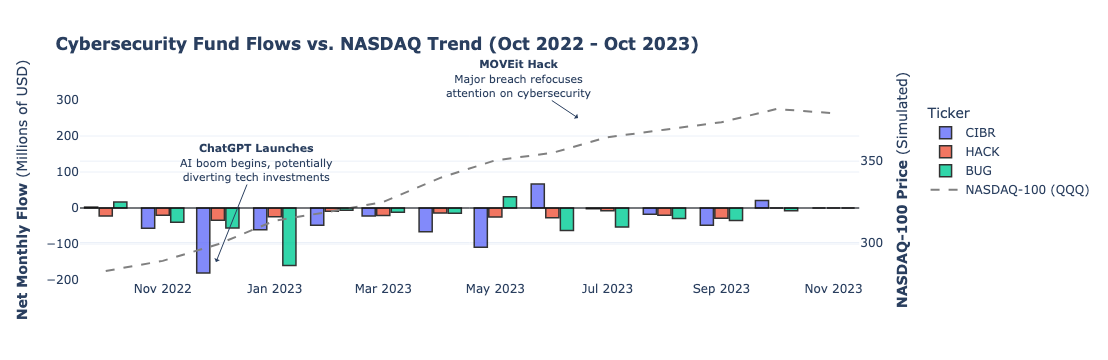

In [136]:
def prepare_fund_flow_data(raw_df, etf_map):
    """
    Takes the raw fund flow DataFrame and transforms it into a clean, 
    long format suitable for plotting.
    """
    clean_df = (
        raw_df
        .pipe(lambda df: df.set_index(df.index.str.strip()))
        .drop(columns=['Ticker', 'Field ID', 'Field Mnemonic', 'Data State'], errors='ignore')
        .T
        .rename_axis('Date')
        .rename(columns=etf_map)
        .reset_index()
        .assign(Date=lambda df: pd.to_datetime(df['Date'], format='%y-%b'))
        .melt(
            id_vars=['Date'], 
            value_vars=list(etf_map.values()),
            var_name='ETF', 
            value_name='Net Flow ($ Mln)'
        )
    )
    return clean_df

def simulate_qqq_data(dates):
    """
    Simulates a realistic NASDAQ-100 (QQQ) price trend for a given date range.
    """
    np.random.seed(42)
    price_trend = np.linspace(280, 370, len(dates))
    price_noise = np.random.normal(0, 5, len(dates)).cumsum()
    simulated_price = price_trend + price_noise
    return pd.DataFrame({'Date': dates, 'QQQ Price': simulated_price})

# --- 1. Define Parameters and Prepare Data ---
ETF_TICKER_MAP = {
    'First Trust NASDAQ Cybersecuri': 'CIBR',
    'ETFMG Prime Cyber Security ETF': 'HACK',
    'Global X Cybersecurity ETF': 'BUG'
}
raw_fund_flows = bloom_cybersec_equity_flows.get_data()
fund_flows_long = prepare_fund_flow_data(raw_fund_flows, ETF_TICKER_MAP)

# --- 2. Prepare Market Context Data ---
unique_dates = np.sort(fund_flows_long['Date'].unique())
qqq_market_data = simulate_qqq_data(unique_dates)

# --- 3. Build the Chart ---
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add a trace for each ETF's fund flow (as bars)
colors = px.colors.qualitative.Plotly
for i, etf_ticker in enumerate(ETF_TICKER_MAP.values()):
    etf_data = fund_flows_long[fund_flows_long['ETF'] == etf_ticker]
    fig.add_trace(
        go.Bar(
            x=etf_data['Date'], 
            y=etf_data['Net Flow ($ Mln)'], 
            name=etf_ticker, 
            marker_color=colors[i],
            marker_line_color='black',
            marker_line_width=1.5,
            opacity=0.8
        ),
        secondary_y=False
    )

# Add a trace for the NASDAQ-100 market trend (as a line)
fig.add_trace(
    go.Scatter(x=qqq_market_data['Date'], y=qqq_market_data['QQQ Price'], name='NASDAQ-100 (QQQ)',
               mode='lines', line=dict(color='grey', dash='dash')),
    secondary_y=True
)

# --- 4. Add Contextual Annotations and Styling ---
fig.add_hline(y=0, line_width=1, line_color="black", secondary_y=False)
fig.add_annotation(
    x='2022-11-30', y=-150,
    text="<b>ChatGPT Launches</b><br>AI boom begins, potentially<br>diverting tech investments",
    showarrow=True, arrowhead=1, ax=40, ay=-100, font=dict(size=11)
)
fig.add_annotation(
    x='2023-06-15', y=250,
    text="<b>MOVEit Hack</b><br>Major breach refocuses<br>attention on cybersecurity",
    showarrow=True, arrowhead=1, ax=-60, ay=-40, font=dict(size=11)
)

fig.update_layout(
    title_text="<b>Cybersecurity Fund Flows vs. NASDAQ Trend (Oct 2022 - Oct 2023)</b>",
    barmode='group',
    template='plotly_white',
    legend_title_text='Ticker',
    bargap=0.15,
    bargroupgap=0.1
)
# --- NEW: Set the range for the primary Y-axis ---
# We set a min of -200 to keep the negative bars visible, and a max of 500 as requested.
fig.update_yaxes(title_text="<b>Net Monthly Flow</b> (Millions of USD)", range=[-200, 300], secondary_y=False)
fig.update_yaxes(title_text="<b>NASDAQ-100 Price</b> (Simulated)", secondary_y=True)

fig.show()

# 9. Case Study: Perceived Airline Bankruptcy Risk During the COVID-19 Pandemic

The global travel industry was arguably the most immediately and severely impacted sector at the onset of the COVID-19 pandemic. To quantify the market's perception of this unprecedented shock, we can analyze the behavior of Credit Default Swaps (CDS) for major airlines.

**Analytical Objective:**
A 5-year CDS spread is a market instrument that acts like an insurance policy against a company defaulting on its debt. A higher spread indicates a higher perceived risk of bankruptcy. This analysis visualizes the CDS spreads for North American and European airline indices to show:
*   The scale of the market panic in early 2020 as global travel ceased.
*   How this event compared to previous periods of market stress.
*   The subsequent recovery in confidence as the industry began to adapt and reopen.

**Methodology:**
The data, sourced from Bloomberg, is filtered to isolate the 5-year CDS indices for North American and European airlines. The data is transposed, and the date columns are converted into a time-series index. The resulting line chart plots the CDS spreads over time, with a shaded vertical rectangle and an annotation highlighting the peak of the crisis in the first half of 2020. This clearly visualizes the extreme market reaction to the global lockdowns.

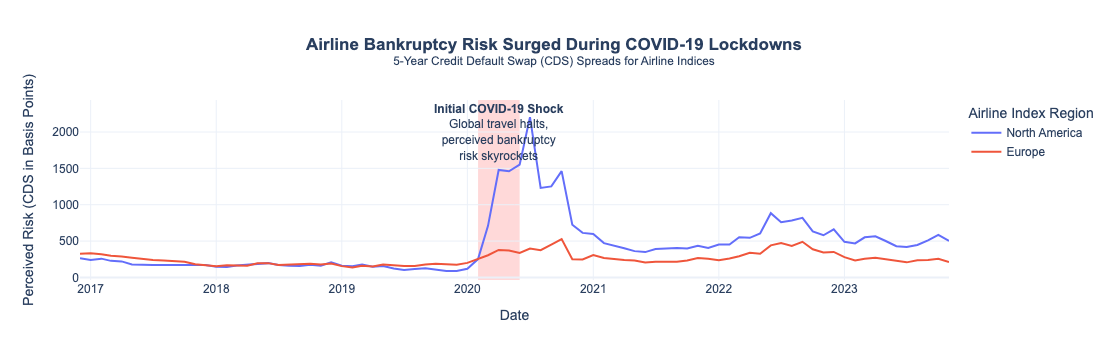

In [134]:
# --- 1. Load and Prepare the Data ---
# Load the raw defense industry data
industry_df = bloom_def_industry.get_data()

# Clean the index to remove leading/trailing spaces
industry_df.index = industry_df.index.str.strip()

# Filter for the relevant airline CDS data
cds_data = industry_df.loc[['North America', 'Europe']]

# Drop non-date columns and transpose the DataFrame
cds_data = cds_data.drop(columns=['Ticker', 'Field ID', 'Field Mnemonic', 'Data State'], errors='ignore')
cds_transposed = cds_data.T

# Convert the index to datetime objects
cds_transposed.index = pd.to_datetime(cds_transposed.index, format='%b-%y')

# Convert the CDS spread values to a numeric type
cds_transposed['North America'] = pd.to_numeric(cds_transposed['North America'])
cds_transposed['Europe'] = pd.to_numeric(cds_transposed['Europe'])

# Reset the index to make 'Date' a column for plotting
cds_transposed.reset_index(inplace=True)
cds_transposed.rename(columns={'index': 'Date'}, inplace=True)

# --- 2. Melt the DataFrame for Plotly Express ---
cds_long = pd.melt(
    cds_transposed,
    id_vars=['Date'],
    value_vars=['North America', 'Europe'],
    var_name='Region',
    value_name='5-Year CDS Spread (Basis Points)'
)

# --- 3. Create the Line Chart ---
fig = px.line(
    cds_long,
    x='Date',
    y='5-Year CDS Spread (Basis Points)',
    color='Region',
    title='<b>Airline Bankruptcy Risk Surged During COVID-19 Lockdowns</b><br><sup>5-Year Credit Default Swap (CDS) Spreads for Airline Indices</sup>',
    template='plotly_white',
    labels={'5-Year CDS Spread (Basis Points)': 'CDS Spread (Basis Points)'}
)

# --- 4. Add Shaded Region and Annotation for COVID-19 Impact ---
# Add a vertical rectangle to highlight the peak of the crisis
fig.add_vrect(
    x0="2020-02-01", x1="2020-06-01",
    fillcolor="red", opacity=0.15,
    layer="below", line_width=0,
)

# Add an annotation to explain the shaded area
fig.add_annotation(
    x="2020-04-01", y=2000, # Position the text within the shaded area
    text="<b>Initial COVID-19 Shock</b><br>Global travel halts,<br>perceived bankruptcy<br>risk skyrockets",
    showarrow=False,
    font=dict(size=12)
)

# --- 5. Update Layout for Clarity ---
fig.update_layout(
    title_x=0.5,
    font=dict(family="Arial, sans-serif"),
    xaxis_title='Date',
    yaxis_title='Perceived Risk (CDS in Basis Points)',
    legend_title_text='Airline Index Region'
)

fig.show()

# 10. The 'Work From Home' Boom: U.S. Homebuilder Confidence

While the pandemic devastated the travel industry, it acted as a massive catalyst for the U.S. housing market. The sudden, widespread shift to remote work created unprecedented demand for more living space, fueling a surge in home construction and a spike in market confidence.

**Analytical Objective:**
To visualize the "V-shaped" shock and recovery of the U.S. housing market by tracking the National Association of Home Builders (NAHB) Market Index. This index serves as a key leading indicator for the housing sector, where a value above 50 indicates a positive outlook. This analysis will show:
*   The initial sharp, but brief, collapse in homebuilder confidence during the March-April 2020 lockdowns.
*   The immediate and powerful rebound as demand for new homes soared.
*   The subsequent boom that pushed builder confidence to record highs.

**Methodology:**
The analysis uses the `NAHB Market Index` from the Bloomberg construction dataset. The time-series data is extracted and plotted on a line chart. To provide context, a horizontal line is drawn at the 50-point threshold, the dividing line between positive and negative sentiment. A shaded region highlights the initial lockdown period, clearly marking the pandemic's onset and the dramatic recovery that followed.

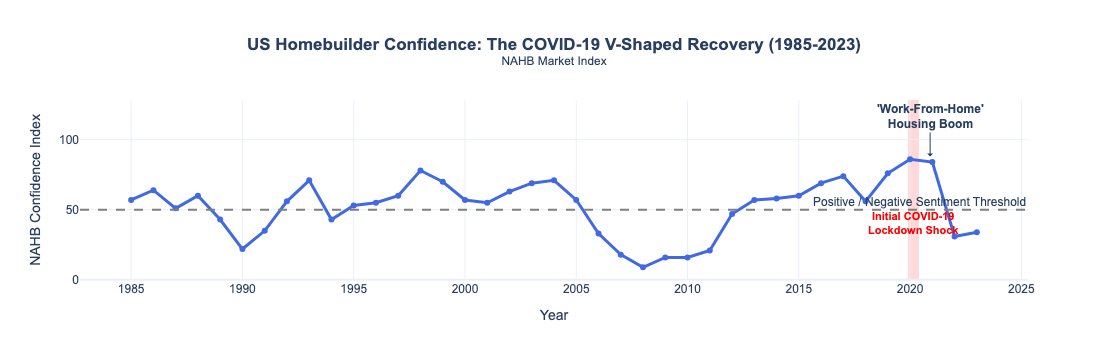

In [130]:
# --- 1. Load and Prepare the Data ---
# Load the construction data
construction_df = bloom_consg_USCAN.get_data()

# Clean the index and select the NAHB Market Index series
construction_df.index = construction_df.index.str.strip()
nahb_series = construction_df.loc['NAHB Market Index']

# Drop non-year columns
nahb_series = nahb_series.drop(labels=['Ticker', 'Field ID', 'Field Mnemonic', 'Data State'], errors='ignore')

# Convert the Series to a DataFrame for plotting
nahb_df = nahb_series.reset_index()
nahb_df.columns = ['Year', 'Index Value']

# Clean data types, ensuring 'Year' is numeric for a continuous axis
nahb_df['Year'] = pd.to_numeric(nahb_df['Year'])
nahb_df['Index Value'] = pd.to_numeric(nahb_df['Index Value'])

# Filter out years with no data to ensure a clean plot
nahb_df = nahb_df[nahb_df['Index Value'] > 0]


# --- 2. Create the Line Chart ---
fig = go.Figure()

# Add the main trace for the NAHB index
fig.add_trace(go.Scatter(
    x=nahb_df['Year'],
    y=nahb_df['Index Value'],
    mode='lines+markers',
    name='NAHB Market Index',
    line=dict(color='royalblue', width=3)
))

# --- 3. Add Contextual Elements ---
# Add a horizontal line at the 50-point threshold
fig.add_hline(
    y=50, line_width=2, line_dash="dash", line_color="grey",
    annotation_text="Positive / Negative Sentiment Threshold",
    annotation_position="top right"
)

# Add a shaded rectangle to highlight the initial COVID-19 dip
fig.add_vrect(
    x0="2019.9", x1="2020.4",
    fillcolor="red", opacity=0.15,
    layer="below", line_width=0,
)

# Add an annotation for the COVID shock
fig.add_annotation(
    x=2020.15, y=40,
    text="<b>Initial COVID-19<br>Lockdown Shock</b>",
    showarrow=False,
    font=dict(size=11, color="red")
)

# Add an annotation for the WFH boom
fig.add_annotation(
    x=2020.9, y=88,
    text="<b>'Work-From-Home'<br>Housing Boom</b>",
    showarrow=True, arrowhead=1, ax=0, ay=-40,
    font=dict(size=12)
)

# --- 4. Update Layout ---
fig.update_layout(
    title='<b>US Homebuilder Confidence: The COVID-19 V-Shaped Recovery (1985-2023)</b><br><sup>NAHB Market Index</sup>',
    title_x=0.5,
    template='plotly_white',
    xaxis_title='Year',
    yaxis_title='NAHB Confidence Index',
    font=dict(family="Arial, sans-serif"),
    showlegend=False
)

fig.show()

# 11. Geographic Distribution of the Global Arms Trade (1950-2022)

While the line charts show *who* the top players are, a choropleth map reveals *where* the centers of gravity in the global arms trade are located. This visualization provides a geographic and temporal overview of the total arms trade volume (imports plus exports) for each nation.

**Analytical Objective:**
To create a dynamic world map that visualizes the total value of arms transferred per country from 1950 to 2022. The interactive time slider will allow us to observe:
*   The concentration of arms transfers in Europe and North America during the Cold War.
*   The emergence of new procurement hotspots in the Middle East and Asia in the post-Cold War era.
*   The global impact of major conflicts on regional arms acquisition patterns.

**Methodology:**
We combine the SIPRI datasets for top arms importers and exporters into a single DataFrame representing total trade volume. This is then merged with the World Bank GDP dataset to obtain the necessary ISO country codes for mapping. Using `plotly.express`, we generate a choropleth map where each country's color intensity corresponds to its total arms trade value for a given year. A logarithmic color scale is used to effectively visualize the wide disparity in trade volumes between nations.

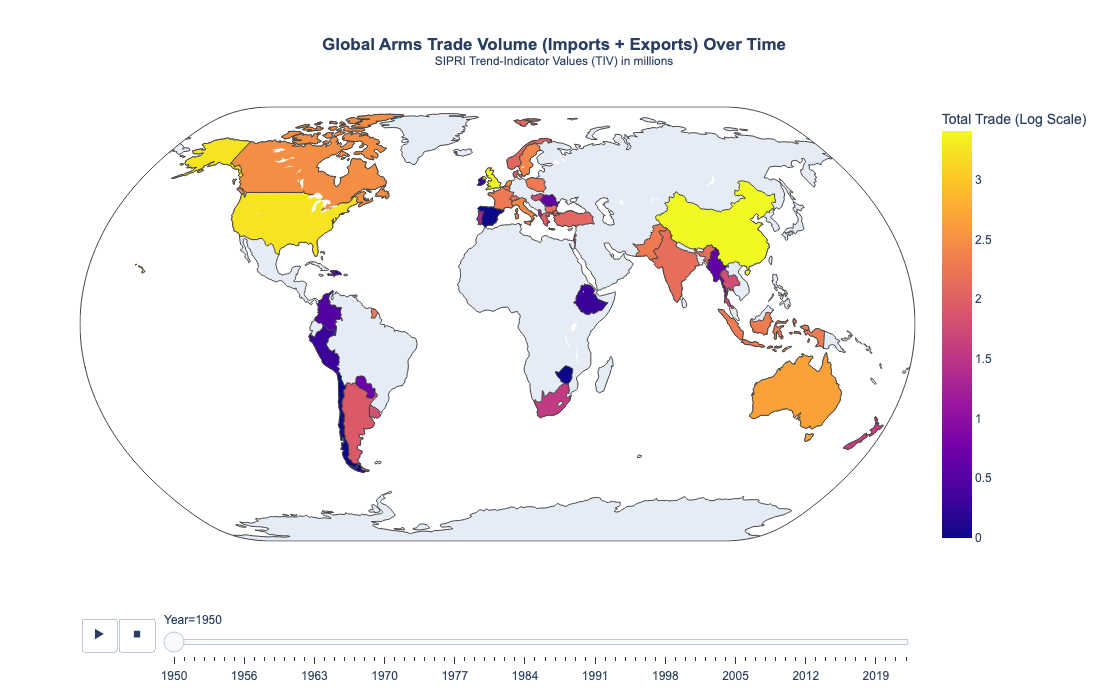

In [132]:
# --- 1. Load and Consolidate Arms Trade Data ---
imports_df = top_200_arms_imports.get_data().copy()
exports_df = top_200_arms_exports.get_data().copy()

imports_df.rename(columns={'Recipient': 'Country Name', 'Value': 'Import Value'}, inplace=True)
exports_df.rename(columns={'Supplier': 'Country Name', 'Value': 'Export Value'}, inplace=True)

imports_agg = imports_df.groupby(['Year', 'Country Name'])['Import Value'].sum().reset_index()
exports_agg = exports_df.groupby(['Year', 'Country Name'])['Export Value'].sum().reset_index()

trade_df = pd.merge(imports_agg, exports_agg, on=['Year', 'Country Name'], how='outer').fillna(0)
trade_df['Total Trade Value'] = trade_df['Import Value'] + trade_df['Export Value']

# --- 2. Add Country Codes for Mapping ---
gdp_df = gdp.get_data()
country_code_map = gdp_df[['Country Name', 'Country Code']].drop_duplicates().set_index('Country Name')
trade_df = trade_df.merge(country_code_map, on='Country Name', how='inner')

# Filter out rows where total trade is zero to avoid log(0) errors
trade_df = trade_df[trade_df['Total Trade Value'] > 0].copy()

# --- FIX: Manually create a new column with the log of the trade value ---
trade_df['Log Trade Value'] = np.log10(trade_df['Total Trade Value'])


# --- 3. Create the Choropleth Map ---
# Use the new 'Log Trade Value' column for the color mapping
fig = px.choropleth(
    trade_df,
    locations="Country Code",
    color="Log Trade Value", # Use the log-transformed column
    hover_name="Country Name",
    hover_data={'Total Trade Value': ':.0f'}, # Still show the original value on hover
    animation_frame="Year",
    color_continuous_scale=px.colors.sequential.Plasma,
    projection="natural earth",
    title="<b>Global Arms Trade Volume (Imports + Exports) Over Time</b><br><sup>SIPRI Trend-Indicator Values (TIV) in millions</sup>"
)

# --- 4. Update Layout ---
# Update the colorbar title to reflect the log scale
fig.update_layout(
    title_x=0.5,
    font=dict(family="Arial, sans-serif"),
    coloraxis_colorbar=dict(title="Total Trade (Log Scale)"),
    width=1000,
    height=700
)

fig.show()

# 12. Decomposing the Global Arms Trade by Weapon Category

To understand the technological landscape of the global arms trade, we can analyze the composition of the market by weapon category. This approach provides a high-level view of which types of military hardware have dominated international transfers over the long term.

**Analytical Objective:**
To visualize the proportional market share of each major weapon category across the entire global export market from 1950-2022. This analysis will show:
*   Which weapon systems, such as Aircraft or Ships, represent the largest share of the total value of the global arms trade.
*   The relative importance of different conventional weapon systems in global military procurement trends.

**Methodology:**
Using the `all_arms_exports` dataset, we aggregate the total export value for each `Arms Category` across all recorded years. A donut chart is then used to visualize the proportional share of each category, providing a clear and intuitive overview of the composition of the global arms market.

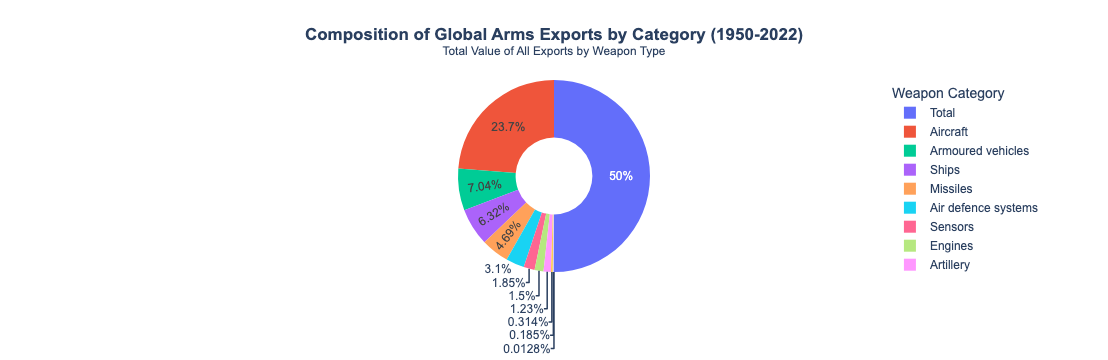

In [126]:
# --- 1. Load the Data ---
# Use the detailed dataset that contains category information.
exports_df = all_arms_exports.get_data().copy()

# --- 2. Aggregate the Data by Category ---
# Sum the total value for each weapon category across all years and countries.
category_totals = exports_df.groupby('Arms Category')['Value'].sum().reset_index()

# --- 3. Create the Donut Chart ---
# This visualizes the composition of the global arms trade by weapon type.
fig = px.pie(
    category_totals,
    names='Arms Category',
    values='Value',
    hole=0.4, # This turns the pie chart into a donut chart
    title="<b>Composition of Global Arms Exports by Category (1950-2022)</b><br><sup>Total Value of All Exports by Weapon Type</sup>"
)

# --- 4. Update Layout for Clarity ---
fig.update_layout(
    title_x=0.5,
    font=dict(family="Arial, sans-serif"),
    legend_title_text='Weapon Category',
    margin=dict(t=80, l=0, r=0, b=0)
)

fig.show()

# 13. Guns vs. Butter: GDP vs. Arms Imports

A fundamental question in political economy is the relationship between a nation's economic output and its military expenditure. While comprehensive defense budget data is not available for all countries, we can use arms import value as a proxy to explore this dynamic.

**Analytical Objective:**
To create an animated bubble chart that compares the GDP of top arms-trading nations with their annual arms import value. The animation will run from 1960 to 2022, allowing us to observe:
*   The general correlation between economic size and arms procurement.
*   Outliers: Countries that spend a disproportionate amount on arms imports relative to their GDP.
*   How these relationships evolve over time, especially during periods of regional conflict or economic booms.

**Methodology:**
We merge the World Bank GDP data with the aggregated SIPRI arms import data. The resulting dataset is used to create a scatter plot where the x-axis is GDP and the y-axis is arms import value. Both axes are logarithmic to accommodate the wide range of values. The size of each bubble represents its arms import value, and an animation slider allows for exploration across the years. *Note: Arms import value is an imperfect but useful proxy for total defense spending.*

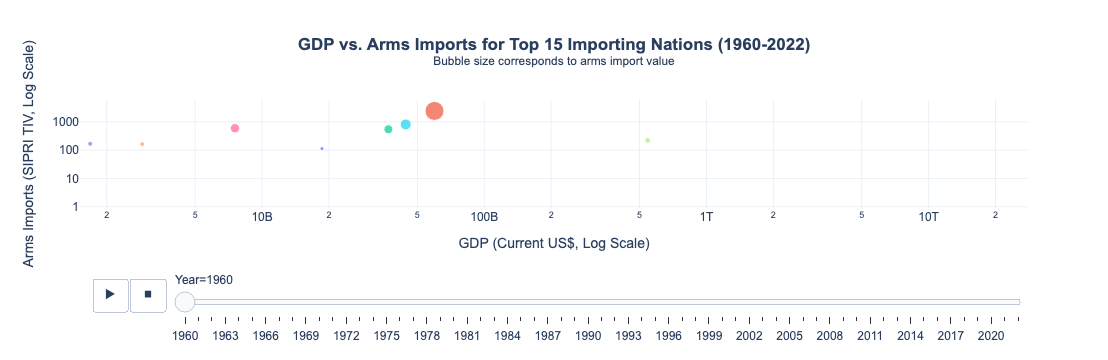

In [124]:
# --- 1. Prepare Arms Imports Data ---
imports_df = top_200_arms_imports.get_data().copy()
imports_df.rename(columns={'Recipient': 'Country Name', 'Value': 'Arms Imports'}, inplace=True)
imports_agg = imports_df.groupby(['Year', 'Country Name'])['Arms Imports'].sum().reset_index()
imports_agg['Year'] = pd.to_numeric(imports_agg['Year'], errors='coerce')
imports_agg.dropna(subset=['Year'], inplace=True)
imports_agg['Year'] = imports_agg['Year'].astype(int)

# --- 2. Prepare GDP Data ---
gdp_df = gdp.get_data().copy()
gdp_df['Year'] = pd.to_numeric(gdp_df['Year'], errors='coerce')
gdp_df['GDP'] = pd.to_numeric(gdp_df['GDP'], errors='coerce')
gdp_df.dropna(subset=['Year', 'GDP'], inplace=True)
gdp_df['Year'] = gdp_df['Year'].astype(int)

# --- 3. Merge Datasets ---
merged_df = pd.merge(
    imports_agg,
    gdp_df,
    on=['Year', 'Country Name'],
    how='inner'
)
merged_df.dropna(subset=['GDP', 'Arms Imports'], inplace=True)


# --- 4. Filter for Top 15 Importers to Reduce Clutter ---
top_15_importers = imports_agg.groupby('Country Name')['Arms Imports'].sum().nlargest(15).index.tolist()
filtered_df = merged_df[merged_df['Country Name'].isin(top_15_importers)].copy()


# --- 5. Create the Animated Bubble Chart ---
plot_df = filtered_df[(filtered_df['GDP'] > 0) & (filtered_df['Arms Imports'] > 0)].copy()

# --- NEW: Calculate the "Imports as % of GDP" for the tooltip ---
# Note: Arms Imports are in millions of TIV, so we multiply by 1e6 to compare with GDP
plot_df['Imports as % of GDP'] = ((plot_df['Arms Imports'] * 1e6) / plot_df['GDP']) * 100


# Find reasonable axis limits to keep the chart stable
min_gdp = plot_df['GDP'].min() * 0.9
max_gdp = plot_df['GDP'].max() * 1.1
min_imports = plot_df['Arms Imports'].min() * 0.9
max_imports = plot_df['Arms Imports'].max() * 1.1

fig = px.scatter(
    plot_df,
    x="GDP",
    y="Arms Imports",
    animation_frame="Year",
    animation_group="Country Name",
    size="Arms Imports",
    color="Country Name",
    hover_name="Country Name",
    log_x=True,
    log_y=True,
    range_x=[min_gdp, max_gdp],
    range_y=[min_imports, max_imports],
    title="<b>GDP vs. Arms Imports for Top 15 Importing Nations (1960-2022)</b><br><sup>Bubble size corresponds to arms import value</sup>",
    template='plotly_white',
    # --- NEW: Customize the hover data with the new percentage ---
    hover_data={
        'Year': False, # Hide the year from the tooltip as it's in the slider
        'GDP': '$,.0f', # Format GDP with a dollar sign and commas
        'Arms Imports': ':,', # Format arms imports with commas
        'Imports as % of GDP': ':.3f}%' # Show percentage with 3 decimal places and a % sign
    }
)

# --- 6. Update Layout ---
fig.update_layout(
    title_x=0.5,
    font=dict(family="Arial, sans-serif"),
    xaxis_title="GDP (Current US$, Log Scale)",
    yaxis_title="Arms Imports (SIPRI TIV, Log Scale)",
    showlegend=False
)

fig.show()

# 14. Conclusion

This analytical journey through global economic and financial data has revealed several key insights into the intricate relationship between world events and market dynamics. By progressing from a high-level macroeconomic view to specific, event-driven case studies, we have demonstrated how diverse sectors respond to global shocks in unique and often divergent ways.

The primary findings of this analysis are:

*   **Global Events Create Divergent Sector Outcomes:** The COVID-19 pandemic serves as a stark example of this principle. While it devastated the travel industry, as evidenced by the dramatic spike in airline bankruptcy risk (CDS spreads), it acted as a powerful catalyst for the U.S. housing market, leading to a record-breaking surge in homebuilder confidence. This highlights that a single global event does not have a monolithic economic impact.

*   **Long-Term Geopolitical and Economic Shifts are Reshaping the World:** The visualization of comparative GDP data vividly illustrates one of the most significant trends of the 21st century: the dramatic rise of China's economic power and the relative rebalancing of global economic influence. Concurrently, the composition of the global arms trade shows a clear technological evolution, with modern systems like missiles and advanced electronics steadily gaining prominence over the conventional hardware that defined the Cold War.

*   **Financial Instruments Serve as Powerful Proxies for Sentiment and Risk:** By analyzing market-driven indicators, we can effectively quantify abstract concepts. The flow of funds into cybersecurity ETFs following the MOVEit hack demonstrates a clear "flight to safety" among investors in response to digital threats, while the behavior of Credit Default Swaps provided a real-time barometer of perceived bankruptcy risk for airlines during the pandemic's peak.

### Future Research and Potential Enhancements

While this analysis provides a comprehensive overview, it also opens the door to several exciting avenues for future research:

*   **Advanced Econometric Modeling:** The ARIMA model served as a technical demonstration. A more advanced analysis could employ models like Vector Autoregression (VAR) to statistically model the interdependent growth of multiple economies or use intervention analysis to quantify the precise impact of the annotated global shocks.

*   **Enhanced Interactivity for Deployed Applications:** For a web-based or dashboard version of this project, incorporating user-driven controls, such as dropdown menus to select countries for comparison or to filter by specific time periods, would transform the visualizations into even more powerful exploratory tools.

*   **Sentiment Analysis on News and Financial Reports:** To add another layer of data, one could perform Natural Language Processing (NLP) on financial news articles or corporate reports published during key events to extract a quantitative sentiment score, which could then be correlated with the market indicators analyzed in this notebook.

Ultimately, this analysis confirms that a multi-faceted approach, combining broad macroeconomic data with targeted, sector-specific indicators, is essential for a comprehensive understanding of our complex and interconnected global economy.

# Appendix: Data Exploration

In [40]:
all_arms_imports.get_data().describe()

Value
count  8.880000e+02
mean   9.158097e+03
std    7.717163e+04
min    0.000000e+00
25%    2.617500e+02
50%    1.255000e+03
75%    4.000000e+03
max    2.033095e+06

In [41]:
all_arms_imports.get_data().isna().sum()

Arms Category    0
Year             0
Value            0
dtype: int64

In [42]:
all_arms_imports.get_data().head()

Arms Category  Year   Value
0             Aircraft  1950  5301.0
1  Air defence systems  1950     0.0
2    Armoured vehicles  1950  1024.0
3            Artillery  1950   337.0
4              Engines  1950   481.0

In [43]:
all_arms_imports.get_data().tail()

Arms Category   Year      Value
883         Other  Total     7538.0
884    Satellites  Total      520.0
885       Sensors  Total    75360.0
886         Ships  Total   256791.0
887         Total  Total  2033095.0

In [44]:
all_arms_exports.get_data().describe()

Value
count  8.880000e+02
mean   9.158097e+03
std    7.717163e+04
min    0.000000e+00
25%    2.617500e+02
50%    1.255000e+03
75%    4.000000e+03
max    2.033095e+06

In [45]:
all_arms_exports.get_data().isna().sum()

Arms Category    0
Year             0
Value            0
dtype: int64

In [46]:
all_arms_exports.get_data().head()

Arms Category  Year   Value
0             Aircraft  1950  5301.0
1  Air defence systems  1950     0.0
2    Armoured vehicles  1950  1024.0
3            Artillery  1950   337.0
4              Engines  1950   481.0

In [47]:
all_arms_exports.get_data().tail()

Arms Category   Year      Value
883         Other  Total     7538.0
884    Satellites  Total      520.0
885       Sensors  Total    75360.0
886         Ships  Total   256791.0
887         Total  Total  2033095.0

In [48]:
top_200_arms_imports.get_data().describe()

Rank 1950-2022         Value
count    14800.000000  1.494800e+04
mean       100.500000  5.440601e+02
std         57.736256  1.692634e+04
min          1.000000  0.000000e+00
25%         50.750000  0.000000e+00
50%        100.500000  1.000000e+00
75%        150.250000  8.400000e+01
max        200.000000  2.033095e+06

In [49]:
top_200_arms_imports.get_data().isna().sum()

Rank 1950-2022    148
Recipient           0
Year                0
Value               0
dtype: int64

In [50]:
top_200_arms_imports.get_data().head()

Rank 1950-2022     Recipient  Year   Value
0             1.0         India  1950   141.0
1             2.0         China  1950  2572.0
2             3.0  Saudi Arabia  1950     0.0
3             4.0         Egypt  1950   152.0
4             5.0         Japan  1950     0.0

In [51]:
top_200_arms_imports.get_data().tail()

Rank 1950-2022                    Recipient       Year      Value
14943           198.0      Khmer Rouge (Cambodia)*  1950-2022       25.0
14944           199.0  Lebanon Palestinian rebels*  1950-2022       25.0
14945           200.0                   Montenegro  1950-2022       24.0
14946             NaN                       Others  1950-2022      347.0
14947             NaN                        Total  1950-2022  2033095.0

In [52]:
top_200_arms_exports.get_data().describe()

Rank 1950-2022         Value
count     9990.000000  1.013800e+04
mean        68.000000  8.021734e+02
std         38.972025  2.225147e+04
min          1.000000  0.000000e+00
25%         34.000000  0.000000e+00
50%         68.000000  0.000000e+00
75%        102.000000  2.000000e+00
max        135.000000  2.033095e+06

In [53]:
top_200_arms_exports.get_data().isna().sum()

Rank 1950-2022    148
Supplier            0
Year                0
Value               0
dtype: int64

In [54]:
top_200_arms_exports.get_data().head()

Rank 1950-2022        Supplier  Year   Value
0             1.0   United States  1950  1388.0
1             2.0    Soviet Union  1950  3974.0
2             3.0          Russia  1950     0.0
3             4.0  United Kingdom  1950  2285.0
4             5.0          France  1950     9.0

In [55]:
bloom_consg_USCAN.get_data().describe()

1984           1985           1986           1987  \
count      76.000000      76.000000      76.000000      76.000000   
mean    21002.629349   22863.676263   24116.168024   25267.054800   
std     78078.482451   85000.339802   89456.174138   93133.185133   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max    385905.000000  420812.000000  434464.000000  459343.000000   

                1988           1989           1990           1991  \
count      76.000000      76.000000      76.000000      76.000000   
mean    26314.151131   26779.029180   26031.690641   24407.515402   
std     96727.627959   98035.194736   94437.697089   87597.411650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max    479559.000000  478202.000000  476777.000000  433334.000000   

                1992           1993  ...          2014          2015  \
count      76.000000      76.000000  ...  7.600000e+01  7.600000e+01   
mean    26433.800350   40719.825966  ...  1.307749e+05  1.426452e+05   
std     95556.938939  109943.206653  ...  2.393713e+05  2.646240e+05   
min         0.000000       0.000000  ...  0.000000e+00  0.000000e+00   
25%         0.000000       0.000000  ...  8.081320e+00  8.953045e+00   
50%         0.000000       0.000000  ...  6.453698e+03  6.638500e+03   
75%         0.000000      57.575000  ...  2.205328e+05  2.322545e+05   
max    478324.000000  533150.000000  ...  1.056429e+06  1.156354e+06   

               2016          2017          2018          2019          2020  \
count  7.600000e+01  7.600000e+01  7.600000e+01  7.600000e+01  7.600000e+01   
mean   1.530870e+05  1.594665e+05  1.616853e+05  1.763482e+05  1.895558e+05   
std    2.886108e+05  3.015557e+05  3.047207e+05  3.313691e+05  3.564824e+05   
min    0.000000e+00  0.000000e+00 -1.840260e+00  0.000000e+00  0.000000e+00   
25%    8.853935e+00  5.592500e+00  7.128012e+00  8.417442e+00  6.250115e+00   
50%    7.672000e+03  8.125000e+03  6.655500e+03  8.533000e+03  9.614000e+03   
75%    2.395515e+05  2.473230e+05  2.551942e+05  2.825282e+05  3.150928e+05   
max    1.270443e+06  1.313666e+06  1.333184e+06  1.466415e+06  1.572760e+06   

               2021          2022          2023  
count  7.600000e+01  7.600000e+01  7.600000e+01  
mean   2.074241e+05  2.258271e+05  1.998213e+05  
std    4.002056e+05  4.328526e+05  4.101055e+05  
min    0.000000e+00 -7.111000e-02  0.000000e+00  
25%    1.907026e+01  1.065742e+01  3.692500e+00  
50%    9.766500e+03  9.458500e+03  6.126000e+03  
75%    2.900535e+05  3.333250e+05  9.994049e+04  
max    1.754426e+06  1.848676e+06  1.996525e+06  

[8 rows x 40 columns]

In [56]:
bloom_consg_USCAN.get_data().isna().sum()

Ticker            0
Field ID          0
Field Mnemonic    0
Data State        0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64

In [57]:
bloom_consg_USCAN.get_data().head()

Ticker Field ID  \
Description                                                       
* Switch View For More Data                          0        0   
United States                                        0        0   
FW Dodge Construction Index             DODGINDX Index    PR005   
US Construction Spending Monthly ($m)                0        0   
U.S. Total Construction Spending (NSA)  CNNSTOTA Index    PX385   

                                       Field Mnemonic Data State        1984  \
Description                                                                    
* Switch View For More Data                         0    Heading       0.000   
United States                                       0    Heading       0.000   
FW Dodge Construction Index                   PX_LAST    Dynamic      45.821   
US Construction Spending Monthly ($m)               0    Heading       0.000   
U.S. Total Construction Spending (NSA)   INTERVAL_SUM    Dynamic  370191.000   

                                              1985        1986        1987  \
Description                                                                  
* Switch View For More Data                  0.000       0.000       0.000   
United States                                0.000       0.000       0.000   
FW Dodge Construction Index                 51.028      54.735      56.809   
US Construction Spending Monthly ($m)        0.000       0.000       0.000   
U.S. Total Construction Spending (NSA)  403414.000  433453.000  446642.000   

                                              1988        1989  ...  \
Description                                                     ...   
* Switch View For More Data                  0.000       0.000  ...   
United States                                0.000       0.000  ...   
FW Dodge Construction Index                 59.389      59.132  ...   
US Construction Spending Monthly ($m)        0.000       0.000  ...   
U.S. Total Construction Spending (NSA)  462013.000  477501.000  ...   

                                             2014       2015       2016  \
Description                                                               
* Switch View For More Data                   0.0        0.0        0.0   
United States                                 0.0        0.0        0.0   
FW Dodge Construction Index                 120.0      127.0      130.0   
US Construction Spending Monthly ($m)         0.0        0.0        0.0   
U.S. Total Construction Spending (NSA)  1015292.0  1132117.0  1213146.0   

                                             2017       2018       2019  \
Description                                                               
* Switch View For More Data                   0.0        0.0        0.0   
United States                                 0.0        0.0        0.0   
FW Dodge Construction Index                 156.0      150.0      171.0   
US Construction Spending Monthly ($m)         0.0        0.0        0.0   
U.S. Total Construction Spending (NSA)  1279841.0  1333184.0  1391038.0   

                                             2020       2021       2022  \
Description                                                               
* Switch View For More Data                   0.0        0.0        0.0   
United States                                 0.0        0.0        0.0   
FW Dodge Construction Index                 175.0      188.0      251.0   
US Construction Spending Monthly ($m)         0.0        0.0        0.0   
U.S. Total Construction Spending (NSA)  1499570.0  1653378.0  1848676.0   

                                             2023  
Description                                        
* Switch View For More Data                   0.0  
United States                                 0.0  
FW Dodge Construction Index                 253.0  
US Construction Spending Monthly ($m)         0.0  
U.S. Total Construction Spending (NSA)  1463494.0  

[5 rows x 44 columns]

In [58]:
bloom_cybersec_equity_flows.get_data().describe()

Field ID  Field Mnemonic       22-Oct       22-Nov       22-Dec  \
count     994.0           994.0   994.000000   994.000000   994.000000   
mean        0.0             0.0    23.336776    15.906628   -15.291096   
std         0.0             0.0   287.755756   208.256056   174.488039   
min         0.0             0.0 -1066.184349  -656.624415 -4289.548643   
25%         0.0             0.0    -1.037497    -0.269394    -1.119688   
50%         0.0             0.0     0.000000     0.000000     0.000000   
75%         0.0             0.0     0.000000     0.000000     0.000000   
max         0.0             0.0  6956.928958  5155.211908   740.675805   

            23-Jan       23-Feb       23-Mar       23-Apr       23-May  \
count   994.000000   994.000000   994.000000   994.000000   994.000000   
mean     -6.775192   -17.863320    -8.559928    -2.658266    17.091899   
std     130.206343   221.132670   187.302924   146.700932   490.647392   
min   -1698.242326 -5367.751881 -3002.108335 -1268.821463 -2486.779395   
25%      -1.196245    -0.972379    -1.521906    -0.886241    -1.569865   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max    1450.195323  1646.510676  1363.877984  1897.458329  8693.378808   

            23-Jun       23-Jul       23-Aug       23-Sep       23-Oct  23-Nov  
count   994.000000   994.000000   994.000000   994.000000   994.000000   994.0  
mean    -27.608213    24.503495     0.772673   -26.066304   -18.604706     0.0  
std     457.916919   325.095416   224.688023   304.818568   277.124071     0.0  
min   -7144.903525 -1967.281269 -2493.790094 -7938.523547 -5886.782483     0.0  
25%      -1.445876     0.000000    -1.477189    -1.361206    -1.382842     0.0  
50%       0.000000     0.000000     0.000000     0.000000     0.000000     0.0  
75%       0.000000     0.099634     0.000000     0.000000     0.000000     0.0  
max    2161.671489  8093.002025  3934.443392   954.776190  2659.590802     0.0

In [59]:
bloom_cybersec_equity_flows.get_data().isna().sum()

Ticker            0
Field ID          0
Field Mnemonic    0
Data State        0
22-Oct            0
22-Nov            0
22-Dec            0
23-Jan            0
23-Feb            0
23-Mar            0
23-Apr            0
23-May            0
23-Jun            0
23-Jul            0
23-Aug            0
23-Sep            0
23-Oct            0
23-Nov            0
dtype: int64

In [60]:
bloom_cybersec_equity_flows.get_data().head()

Ticker  Field ID  \
Description                                                        
All tickers and data are US listed                   0       0.0   
Sector Focus Flows ($ Mln)                           0       0.0   
    Communications                                   0       0.0   
        Global X MSCI China Communicat  CHIC US Equity       0.0   
        Vanguard Communication Service   VOX US Equity       0.0   

                                        Field Mnemonic  Data State  \
Description                                                          
All tickers and data are US listed                 0.0     Heading   
Sector Focus Flows ($ Mln)                         0.0         Sum   
    Communications                                 0.0         Sum   
        Global X MSCI China Communicat             0.0  Expression   
        Vanguard Communication Service             0.0  Expression   

                                             22-Oct       22-Nov       22-Dec  \
Description                                                                     
All tickers and data are US listed         0.000000     0.000000     0.000000   
Sector Focus Flows ($ Mln)              6956.928958  5155.211908 -4289.548643   
    Communications                       501.660050   -73.034899   -78.026331   
        Global X MSCI China Communicat     0.000000     0.000000    -0.388800   
        Vanguard Communication Service   -26.756500   104.081000   -11.844000   

                                             23-Jan       23-Feb       23-Mar  \
Description                                                                     
All tickers and data are US listed         0.000000     0.000000     0.000000   
Sector Focus Flows ($ Mln)             -1698.242326 -5367.751881 -3002.108335   
    Communications                       114.999956   -26.877201   162.345411   
        Global X MSCI China Communicat     0.000000     0.000000     0.000000   
        Vanguard Communication Service   -12.899349    22.970250   -98.185500   

                                            23-Apr       23-May       23-Jun  \
Description                                                                    
All tickers and data are US listed        0.000000     0.000000     0.000000   
Sector Focus Flows ($ Mln)             -260.546345  3038.742870 -7144.903525   
    Communications                      945.694498   696.853327   171.451648   
        Global X MSCI China Communicat    0.000000     0.000000     0.000000   
        Vanguard Communication Service   33.857250   -38.923750     8.012000   

                                             23-Jul      23-Aug       23-Sep  \
Description                                                                    
All tickers and data are US listed         0.000000    0.000000     0.000000   
Sector Focus Flows ($ Mln)              8093.002025 -846.931405 -7938.523547   
    Communications                       908.744319  381.226156 -1049.349721   
        Global X MSCI China Communicat     0.000000    0.000000    -0.702000   
        Vanguard Communication Service   255.757750   93.558000    21.327500   

                                             23-Oct  23-Nov  
Description                                                  
All tickers and data are US listed         0.000000     0.0  
Sector Focus Flows ($ Mln)             -5886.782483     0.0  
    Communications                        89.286933     0.0  
        Global X MSCI China Communicat     0.000000     0.0  
        Vanguard Communication Service  -169.954750     0.0

In [61]:
bloom_cybersec_equity_flows.get_data().tail()

Ticker  Field ID  \
Description                                                                    
            First Trust Indxx Metaverse ET          ARVR US Equity       0.0   
            Fidelity Metaverse ETF                  FMET US Equity       0.0   
            iShares Future Metaverse Tech           IVRS US Equity       0.0   
            Proshares Metaverse ETF                 VERS US Equity       0.0   
3/24/2023  - Tickers listed after this date not...               0       0.0   

                                                    Field Mnemonic  \
Description                                                          
            First Trust Indxx Metaverse ET                     0.0   
            Fidelity Metaverse ETF                             0.0   
            iShares Future Metaverse Tech                      0.0   
            Proshares Metaverse ETF                            0.0   
3/24/2023  - Tickers listed after this date not...             0.0   

                                                    Data State  22-Oct  \
Description                                                              
            First Trust Indxx Metaverse ET          Expression     0.0   
            Fidelity Metaverse ETF                  Expression     0.0   
            iShares Future Metaverse Tech           Expression     0.0   
            Proshares Metaverse ETF                 Expression     0.0   
3/24/2023  - Tickers listed after this date not...     Heading     0.0   

                                                    22-Nov  22-Dec  23-Jan  \
Description                                                                  
            First Trust Indxx Metaverse ET             0.0     0.0     0.0   
            Fidelity Metaverse ETF                     0.0     0.0     0.0   
            iShares Future Metaverse Tech              0.0     0.0     0.0   
            Proshares Metaverse ETF                    0.0     0.0     0.0   
3/24/2023  - Tickers listed after this date not...     0.0     0.0     0.0   

                                                    23-Feb  23-Mar   23-Apr  \
Description                                                                   
            First Trust Indxx Metaverse ET             0.0     0.0  0.00000   
            Fidelity Metaverse ETF                     0.0     0.0  0.00000   
            iShares Future Metaverse Tech              0.0     0.0  0.00000   
            Proshares Metaverse ETF                    0.0     0.0 -0.66488   
3/24/2023  - Tickers listed after this date not...     0.0     0.0  0.00000   

                                                    23-May    23-Jun   23-Jul  \
Description                                                                     
            First Trust Indxx Metaverse ET             0.0  0.000000  0.00000   
            Fidelity Metaverse ETF                     0.0  1.253581  1.36207   
            iShares Future Metaverse Tech              0.0  0.000000  0.00000   
            Proshares Metaverse ETF                    0.0  0.000000  0.00000   
3/24/2023  - Tickers listed after this date not...     0.0  0.000000  0.00000   

                                                    23-Aug    23-Sep  23-Oct  \
Description                                                                    
            First Trust Indxx Metaverse ET             0.0  0.000000     0.0   
            Fidelity Metaverse ETF                     0.0  0.007995     0.0   
            iShares Future Metaverse Tech              0.0  0.000000     0.0   
            Proshares Metaverse ETF                    0.0  0.000000     0.0   
3/24/2023  - Tickers listed after this date not...     0.0  0.000000     0.0   

                                                    23-Nov  
Description                                                 
            First Trust Indxx Metaverse ET             0.0  
            Fidelity Metaverse ETF                     0.0  
            iSh

In [62]:
bloom_def_budget.get_data().describe()

Ticker  Field ID  Field Mnemonic        1999        2000        2001  \
count    32.0      32.0            32.0   32.000000   32.000000   32.000000   
mean      0.0       0.0             0.0   17.871875   19.131250   21.390625   
std       0.0       0.0             0.0   55.866969   59.611135   66.669775   
min       0.0       0.0             0.0    0.000000    0.000000    0.000000   
25%       0.0       0.0             0.0    0.000000    0.000000    0.000000   
50%       0.0       0.0             0.0    0.000000    0.000000    0.000000   
75%       0.0       0.0             0.0    0.000000    0.000000    0.000000   
max       0.0       0.0             0.0  290.500000  309.900000  345.600000   

             2002        2003        2004        2005  ...        2014  \
count   32.000000   32.000000   32.000000   32.000000  ...   32.000000   
mean    27.140625   29.084375   29.906250   33.321875  ...  103.289969   
std     84.795773   91.017159   93.019044  103.697910  ...  204.401949   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...   70.225000   
max    437.900000  471.000000  483.900000  536.500000  ...  581.300000   

             2015       2016        2017        2018        2019        2020  \
count   32.000000   32.00000   32.000000   32.000000   32.000000   32.000000   
mean   108.190687  109.59500  121.595719  135.346844  138.628094  137.760781   
std    209.925099  212.73463  236.453386  264.764734  270.382057  269.461162   
min      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
75%     81.250000   82.15850   94.097000  105.611750  113.900000  115.253250   
max    592.300000  593.12900  646.929000  750.994000  756.927000  768.334000   

             2021        2022        2023  
count   32.000000   32.000000   32.000000  
mean    45.374969  150.906219   53.375000  
std    138.259091  294.891987  162.235381  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000  134.057500    0.000000  
max    715.000000  828.000000  842.000000  

[8 rows x 28 columns]

In [63]:
bloom_def_budget.get_data().isna().sum()

Ticker            0
Field ID          0
Field Mnemonic    0
Data State        0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64

In [64]:
bloom_def_budget.get_data().head()

Ticker  Field ID  Field Mnemonic  \
Description                                                                  
Defense Budgets (in Bn $USD).                0.0       0.0             0.0   
U.S. Dept of Defense Budget (incl. OCO).     0.0       0.0             0.0   
Defense Budget Fiscal Year.                  0.0       0.0             0.0   
Total Budget Authority (Account 051)         0.0       0.0             0.0   
    Operation and Maintenance                0.0       0.0             0.0   

                                         Data State   1999   2000   2001  \
Description                                                                
Defense Budgets (in Bn $USD).               Heading    0.0    0.0    0.0   
U.S. Dept of Defense Budget (incl. OCO).    Heading    0.0    0.0    0.0   
Defense Budget Fiscal Year.                  Static    0.0    0.0    0.0   
Total Budget Authority (Account 051)         Static  290.5  309.9  345.6   
    Operation and Maintenance                Static  108.8  115.8  133.9   

                                           2002   2003   2004  ...   2014  \
Description                                                    ...          
Defense Budgets (in Bn $USD).               0.0    0.0    0.0  ...    0.0   
U.S. Dept of Defense Budget (incl. OCO).    0.0    0.0    0.0  ...    0.0   
Defense Budget Fiscal Year.                 0.0    0.0    0.0  ...   15.0   
Total Budget Authority (Account 051)      437.9  471.0  483.9  ...  581.3   
    Operation and Maintenance             178.3  189.8  179.2  ...  199.4   

                                           2015     2016     2017     2018  \
Description                                                                  
Defense Budgets (in Bn $USD).               0.0    0.000    0.000    0.000   
U.S. Dept of Defense Budget (incl. OCO).    0.0    0.000    0.000    0.000   
Defense Budget Fiscal Year.                16.0   17.000   18.000   19.000   
Total Budget Authority (Account 051)      592.3  590.578  646.929  695.091   
    Operation and Maintenance             250.8  251.840  272.966  284.553   

                                             2019     2020     2021     2022  \
Description                                                                    
Defense Budgets (in Bn $USD).               0.000    0.000    0.000    0.000   
U.S. Dept of Defense Budget (incl. OCO).    0.000    0.000    0.000    0.000   
Defense Budget Fiscal Year.                20.000   21.000   22.000   23.000   
Total Budget Authority (Account 051)      723.224  703.723  715.000  773.000   
    Operation and Maintenance             300.401  283.395  290.361  309.343   

                                           2023  
Description                                      
Defense Budgets (in Bn $USD).               0.0  
U.S. Dept of Defense Budget (incl. OCO).    0.0  
Defense Budget Fiscal Year.                24.0  
Total Budget Authority (Account 051)      842.0  
    Operation and Maintenance             329.7  

[5 rows x 29 columns]

In [65]:
bloom_def_budget.get_data().tail()

Ticker  Field ID  \
Description                                                            
    2025 Budget                                        0.0       0.0   
    2026 Budget                                        0.0       0.0   
    2027 Budget                                        0.0       0.0   
Source: National Defense Budget Estimates (Gree...     0.0       0.0   
NaN                                                    0.0       0.0   

                                                    Field Mnemonic Data State  \
Description                                                                     
    2025 Budget                                                0.0     Static   
    2026 Budget                                                0.0     Static   
    2027 Budget                                                0.0     Static   
Source: National Defense Budget Estimates (Gree...             0.0    Heading   
NaN                                                            0.0     Static   

                                                    1999  2000  2001  2002  \
Description                                                                  
    2025 Budget                                      0.0   0.0   0.0   0.0   
    2026 Budget                                      0.0   0.0   0.0   0.0   
    2027 Budget                                      0.0   0.0   0.0   0.0   
Source: National Defense Budget Estimates (Gree...   0.0   0.0   0.0   0.0   
NaN                                                  0.0   0.0   0.0   0.0   

                                                    2003  2004  ...  2014  \
Description                                                     ...         
    2025 Budget                                      0.0   0.0  ...   0.0   
    2026 Budget                                      0.0   0.0  ...   0.0   
    2027 Budget                                      0.0   0.0  ...   0.0   
Source: National Defense Budget Estimates (Gree...   0.0   0.0  ...   0.0   
NaN                                                  0.0   0.0  ...   0.0   

                                                    2015  2016  2017  2018  \
Description                                                                  
    2025 Budget                                      0.0   0.0   0.0   0.0   
    2026 Budget                                      0.0   0.0   0.0   0.0   
    2027 Budget                                      0.0   0.0   0.0   0.0   
Source: National Defense Budget Estimates (Gree...   0.0   0.0   0.0   0.0   
NaN                                                  0.0   0.0   0.0   0.0   

                                                    2019     2020  2021  \
Description                                                               
    2025 Budget                                      0.0  768.334   0.0   
    2026 Budget                                      0.0    0.000   0.0   
    2027 Budget                                      0.0    0.000   0.0   
Source: National Defense Budget Estimates (Gree...   0.0    0.000   0.0   
NaN                                                  0.0    0.000   0.0   

                                                     2022  2023  
Description                                                      
    2025 Budget                                     809.0   0.0  
    2026 Budget                                     822.0   0.0  
    2027 Budget                                     828.0   0.0  
Source: National Defense Budget Estimates (Gree...    0.0   0.0  
NaN                                                   0.0   0.0  

[5 rows x 29 columns]

In [66]:
bloom_def_industry.get_data().describe()

Nov-23       Oct-23         Sep-23         Aug-23         Jul-23  \
count   68.000000    68.000000      68.000000      68.000000      68.000000   
mean    75.149404    99.413591   12585.637270   12499.885098   12237.230104   
std    175.942420   203.115815   67876.169335   67235.807525   65436.804820   
min      0.000000     0.000000       0.000000       0.000000       0.000000   
25%      0.000000     0.000000       0.000000       0.000000       0.000000   
50%      0.000000    13.550000      14.875000      15.375000      17.630000   
75%     13.855000    84.153752     100.337500      91.055003      96.947500   
max    818.095000  1008.700000  424906.000000  422236.000000  413462.000000   

              Jun-23         May-23         Apr-23         Mar-23  \
count      68.000000      68.000000      68.000000      68.000000   
mean    12696.040527   13229.610015   12817.415941   13346.048851   
std     67865.498427   70870.607893   68323.049218   71062.812431   
min         0.000000       0.000000       0.000000      -1.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%        19.580000      19.610000      19.900000      18.940000   
75%       103.535000     103.106875     108.546250     112.446879   
max    428102.000000  446806.000000  432482.000000  450536.000000   

              Feb-23  ...         Sep-17         Aug-17         Jul-17  \
count      68.000000  ...      68.000000      68.000000      68.000000   
mean    11737.300377  ...   11455.595164   11397.312503   10690.335765   
std     62655.176149  ...   61918.330786   61370.038460   57158.169810   
min         0.000000  ...       0.000000       0.000000      -2.000000   
25%         0.000000  ...       0.675000       0.000000       0.000000   
50%        22.585000  ...      15.650000       9.165000       9.500000   
75%       100.875000  ...      68.581875      72.816250      71.418750   
max    396146.000000  ...  387788.000000  385844.000000  361778.000000   

              Jun-17         May-17         Apr-17         Mar-17  \
count      68.000000      68.000000      68.000000      68.000000   
mean    11094.402795   11373.984581   11064.320941   11427.321132   
std     59272.431211   60862.074447   59066.367033   60939.396753   
min        -2.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%        16.933333      15.650000       9.100000      13.000000   
75%       102.900000      82.699375      91.368758     102.718743   
max    375288.000000  384882.000000  374200.000000  386464.000000   

              Feb-17         Jan-17        Dec-16  
count      68.000000      68.000000  6.800000e+01  
mean    10163.771268   10289.176476  7.422927e+04  
std     54318.422549   54893.252748  5.290476e+05  
min        -6.000000       0.000000  0.000000e+00  
25%         0.000000       0.000000  0.000000e+00  
50%         7.080000      10.830000  1.643500e+01  
75%       114.977500     108.367500  1.541475e+02  
max    343368.000000  347614.000000  4.349740e+06  

[8 rows x 84 columns]

In [67]:
bloom_def_industry.get_data().isna().sum()

Ticker            0
Field ID          0
Field Mnemonic    0
Data State        0
Nov-23            0
                 ..
Apr-17            0
Mar-17            0
Feb-17            0
Jan-17            0
Dec-16            0
Length: 88, dtype: int64

In [68]:
bloom_def_industry.get_data().head()

Ticker Field ID  \
Description                                                     
Monthly Boeing/Airbus Orders (Units).              0        0   
Narrowbody Unit Orders                             0        0   
Airbus                                 AIR FP Equity    BI047   
Boeing                                  BA US Equity    BI047   
Widebody Unit Orders                               0        0   

                                          Field Mnemonic Data State  Nov-23  \
Description                                                                   
Monthly Boeing/Airbus Orders (Units).                  0    Heading     0.0   
Narrowbody Unit Orders                                 0        Sum     0.0   
Airbus                                 BICS_SEGMENT_DATA    Dynamic     0.0   
Boeing                                 BICS_SEGMENT_DATA    Dynamic     0.0   
Widebody Unit Orders                                   0        Sum     0.0   

                                       Oct-23  Sep-23  Aug-23  Jul-23  Jun-23  \
Description                                                                     
Monthly Boeing/Airbus Orders (Units).     0.0     0.0     0.0     0.0     0.0   
Narrowbody Unit Orders                   83.0    13.0    87.0    49.0   835.0   
Airbus                                   83.0    13.0    87.0    49.0   835.0   
Boeing                                    0.0     0.0     0.0     0.0     0.0   
Widebody Unit Orders                     12.0    67.0     7.0    40.0    75.0   

                                       ...  Sep-17  Aug-17  Jul-17  Jun-17  \
Description                            ...                                   
Monthly Boeing/Airbus Orders (Units).  ...     0.0     0.0     0.0     0.0   
Narrowbody Unit Orders                 ...    40.0    10.0    -2.0   132.0   
Airbus                                 ...    40.0    10.0    -2.0   132.0   
Boeing                                 ...     0.0     0.0     0.0     0.0   
Widebody Unit Orders                   ...    27.0     2.0    13.0    78.0   

                                       May-17  Apr-17  Mar-17  Feb-17  Jan-17  \
Description                                                                     
Monthly Boeing/Airbus Orders (Units).     0.0     0.0     0.0     0.0     0.0   
Narrowbody Unit Orders                   30.0     6.0    14.0    -6.0     1.0   
Airbus                                   30.0     6.0    14.0    -6.0     1.0   
Boeing                                    0.0     0.0     0.0     0.0     0.0   
Widebody Unit Orders                     30.0    13.0    13.0     1.0    19.0   

                                       Dec-16  
Description                                    
Monthly Boeing/Airbus Orders (Units).     0.0  
Narrowbody Unit Orders                  261.0  
Airbus                                  261.0  
Boeing                                    0.0  
Widebody Unit Orders                     68.0  

[5 rows x 88 columns]

In [69]:
bloom_def_industry.get_data().tail()

Ticker Field ID Field Mnemonic  \
Description                                                                 
Monthly Trends (Flights - actual)  AEROBMTA Index    PR005        PX_LAST   
Domestic                           AEROBMDA Index    PR005        PX_LAST   
International                      AEROBMIA Index    PR005        PX_LAST   
Overall Trends (Flights - actual)  AER1BTAT Index    PR005        PX_LAST   
Source: FAA                                     0        0              0   

                                  Data State  Nov-23  Oct-23    Sep-23  \
Description                                                              
Monthly Trends (Flights - actual)    Dynamic     0.0     0.0  424906.0   
Domestic                             Dynamic     0.0     0.0  368388.0   
International                        Dynamic     0.0     0.0   56518.0   
Overall Trends (Flights - actual)    Dynamic     0.0     0.0       0.0   
Source: FAA                          Heading     0.0     0.0       0.0   

                                     Aug-23    Jul-23    Jun-23  ...  \
Description                                                      ...   
Monthly Trends (Flights - actual)  422236.0  413462.0  428102.0  ...   
Domestic                           362910.0  349292.0  363440.0  ...   
International                       59326.0   64170.0   64662.0  ...   
Overall Trends (Flights - actual)       0.0       0.0       0.0  ...   
Source: FAA                             0.0       0.0       0.0  ...   

                                     Sep-17    Aug-17    Jul-17    Jun-17  \
Description                                                                 
Monthly Trends (Flights - actual)  387788.0  385844.0  361778.0  375288.0   
Domestic                           335710.0  330508.0  304052.0  315106.0   
International                       52078.0   55336.0   57726.0   60182.0   
Overall Trends (Flights - actual)       0.0       0.0       0.0       0.0   
Source: FAA                             0.0       0.0       0.0       0.0   

                                     May-17    Apr-17    Mar-17    Feb-17  \
Description                                                                 
Monthly Trends (Flights - actual)  384882.0  374200.0  386464.0  343368.0   
Domestic                           324304.0  313664.0  322960.0  289696.0   
International                       60578.0   60536.0   63504.0   53672.0   
Overall Trends (Flights - actual)       0.0       0.0       0.0       0.0   
Source: FAA                             0.0       0.0       0.0       0.0   

                                     Jan-17     Dec-16  
Description                                             
Monthly Trends (Flights - actual)  347614.0   346330.0  
Domestic                           291776.0   289872.0  
International                       55838.0    56458.0  
Overall Trends (Flights - actual)       0.0  4349740.0  
Source: FAA                             0.0        0.0  

[5 rows x 88 columns]

In [70]:
gdp.get_data().describe()

Country Name Country Code        Series Name     Series Code   Year  \
count         17344        17344              17344           17344  17344   
unique          267          267                  4               2     64   
top               0            0  GDP (current US$)  NY.GDP.MKTP.CD  index   
freq            320          320              17024           17024    271   

          GDP  
count   17344  
unique  13514  
top        ..  
freq     3393

In [71]:
gdp.get_data().isna().sum()

Country Name    0
Country Code    0
Series Name     0
Series Code     0
Year            0
GDP             0
dtype: int64

In [72]:
gdp.get_data().head()

Country Name Country Code        Series Name     Series Code   Year GDP
0     Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD  index   0
1         Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD  index   1
2         Algeria          DZA  GDP (current US$)  NY.GDP.MKTP.CD  index   2
3  American Samoa          ASM  GDP (current US$)  NY.GDP.MKTP.CD  index   3
4         Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD  index   4

In [73]:
gdp.get_data().tail()

Country Name Country Code  \
17339            0            0   
17340            0            0   
17341            0            0   
17342            0            0   
17343            0            0   

                                            Series Name Series Code  Year GDP  
17339                                                 0           0  2022   0  
17340                                                 0           0  2022   0  
17341                                                 0           0  2022   0  
17342  Data from database: World Development Indicators           0  2022   0  
17343                          Last Updated: 10/26/2023           0  2022   0